In [1]:
from JSU_lib import *

In [2]:
def convert_dict_to_df(data_dict):
    # Convert the dictionary with lists into a DataFrame with each element of the list expanded into a row
    rows = []
    for dataset, values in data_dict.items():
        for value in values:
            rows.append({'dataset': dataset, 'value': value})
    return pd.DataFrame(rows)

def plot_discretised_distribution(df, column_name, bins, labels, order, palette, leg_title, FSIZE = (10, 6), DPI = 100, out = None):
    # Discretise the column
    df_copy = df.query('dataset in @my_order').copy()
    df_copy[column_name + '_bins'] = pd.cut(df_copy[column_name], bins=bins, labels=labels, include_lowest=True)
    
    # Converting 'dataset' to a categorical type with a specific order
    if order:
        df_copy['dataset'] = pd.Categorical(df_copy['dataset'], categories=order, ordered=True)
        df_copy = df_copy.sort_values('dataset')
        print(df_copy.dataset.unique().tolist())
    # Prepare the data for plotting
    grouped_data = df_copy.groupby(['dataset', column_name + '_bins']).size().unstack(fill_value=0)
    
    # Normalize the data so each bar sums to 1.0
    normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)
    
    # Plot a stacked bar plot with proportions and a color palette
    fig, ax = plt.subplots(figsize=FSIZE, dpi=DPI)  # Include dpi setting here for the figure
    normalized_data.plot(kind='bar', width=0.75, stacked=True, color=palette, edgecolor="k", linewidth=1, ax = ax)
    ax.set_xlabel('Dataset')
    ax.set_ylabel('p')
    plt.xticks(rotation=45)
    plt.ylim(0,1)
    plt.legend(title=leg_title, bbox_to_anchor=(1.05, 1), loc='upper left', edgecolor='black')
    plt.axhline(y=0.5, linestyle="--", color="k", linewidth=1)
    plt.yticks([0, 0.25, 0.5, 0.75, 1.0])
    if out != None:
        plt.savefig(out)
    plt.show()
    return grouped_data

def get_color_range(n, cmap):
    fls = list(np.linspace(0, 1, n))
    #print(fls)
    colors = [cmap(fl) for fl in fls]
    return colors

def frequency_count(lst, labels):
    return [lst.count(lab) for lab in labels]

def plot_normalised_stacked_bar(data, labels, ticklabs, title="Stacked Bar Plot", FSIZE = (5,5), DPI = 100, colors=None, legend_title=None, out = None):
    """
    Plots a stacked vertical bar plot for given lists of data where each bar's total height is normalized to 1.

    Parameters:
        data (list of lists): Each sublist contains counts for elements, and each list represents a different category.
        labels (list): Labels for each of the elements (same length as each sublist in data).
        title (str): Title of the plot.
        colors (list): Colors for each element.
        legend_title (str): Title for the legend.

    Returns:
        A matplotlib bar plot.
    """
    data = np.array(data)
    data_normalized = data / data.sum(axis=1, keepdims=True)
    fig, ax = plt.subplots(figsize = FSIZE, dpi = DPI)
    bar_width = 0.75
    indices = np.arange(data.shape[0])
    
    # Initialize the bottom array for the stacked bars
    bottom = np.zeros(data.shape[0])

    # Plot bars
    for i in range(data.shape[1]):
        ax.bar(indices, data_normalized[:, i], bar_width, bottom=bottom, color=colors[i], label=labels[i], linewidth = 1, edgecolor = "k")
        bottom += data_normalized[:, i]
        
    ax.set_xlabel('Dataset')
    ax.set_ylabel('p')
    #ax.set_xticklabels(range(len(ticklabs)), ticklabs, rotation = 45)
    plt.xticks(range(len(ticklabs)), ticklabs, rotation = 45)
    ax.set_ylim(0, 1)
    ax.set_xlim(-0.6, 8.6)
    plt.yticks([0, 0.25, 0.5, 0.75, 1.0])
    plt.axhline(y=0.5, linestyle="--", color="k", linewidth=1)
    plt.legend(title=legend_title, bbox_to_anchor=(1.05, 1), loc='upper left', edgecolor='black')
    if out != None:
        plt.savefig(out)
    plt.show()

#https://www.imgt.org/IMGTeducation/Aide-memoire/_UK/aminoacids/abbreviation.html#:~:text=The%20mean%20molecular%20mass%20of,per%20amino%20acid%20is%2019.20.
def estimate_atoms_in_peptide(n_mer):
    n = int(n_mer.split("-")[0])
    avg_n_atoms = 19.2 
    return round(n*avg_n_atoms)

def get_dict_length(d):
    return len(d)

assembly_chains_dict =  {
    'monomer': 1,
    'dimer': 2,
    'trimer': 3,
    'tetramer': 4,
    'pentamer': 5,
    'hexamer': 6,
    'octamer': 8,
    'nonamer': 9,
    'decamer': 10,
    'dodecamer': 12,
    'tetradecamer': 14,
    'pentadecamer': 15,
    'octadecamer': 18,
    '24-mer': 24,
    '240-mer': 240,
    '300-mer': 300,
    # add more mappings as necessary
}

In [3]:
molecule_mapping2 = {
    "NON-POLYMER"                         :    "Non-Polymer",  "non-polymer"                           :     "Non-Polymer",
    
    "L-PEPTIDE LINKING"                   :    "Peptide",      "peptide-like"                          :     "Peptide",  
    "L-peptide linking"                   :    "Peptide",      "D-PEPTIDE LINKING"                     :     "Peptide",
    "peptide linking"                     :    "Peptide",      "PEPTIDE-LIKE"                          :     "Peptide",
    "D-peptide linking"                   :    "Peptide",      "PEPTIDE LINKING"                       :     "Peptide",  
    "L-peptide NH3 amino terminus"        :    "Peptide",      "D-PEPTIDE NH3 AMINO TERMINUS"          :     "Peptide",
    "L-peptide COOH carboxy terminus"     :    "Peptide",      "L-PEPTIDE COOH CARBOXY TERMINUS"       :     "Peptide",
    "L-gamma-peptide, C-delta linking"    :    "Peptide",      "L-beta-peptide, C-gamma linking"       :     "Peptide",
    "Peptide-like"                        :    "Peptide",      "D-peptide NH3 amino terminus"          :     "Peptide", 
    "D-beta-peptide, C-gamma linking"     :    "Peptide",      "D-gamma-peptide, C-delta linking"      :     "Peptide",

    "D-saccharide"                        :    "Saccharide",   "D-saccharide, alpha linking"           :     "Saccharide",
    "D-saccharide, beta linking"          :    "Saccharide",   "saccharide"                            :     "Saccharide",
    "L-saccharide, alpha linking"         :    "Saccharide",   "L-saccharide"                          :     "Saccharide",
    "SACCHARIDE"                          :    "Saccharide",   "D-SACCHARIDE"                          :     "Saccharide",
    "L-saccharide, beta linking"          :    "Saccharide",   "L-SACCHARIDE"                          :     "Saccharide",
    
    "DNA LINKING"                         :    "Nucleic Acid",          "DNA linking"                           :     "Nucleic Acid", 
    "DNA OH 3 prime terminus"             :    "Nucleic Acid",          "DNA OH 3 PRIME TERMINUS"               :     "Nucleic Acid",
    "DNA OH 5 prime terminus"             :    "Nucleic Acid",          "L-DNA linking"                         :     "Nucleic Acid",
    "L-DNA LINKING"                       :    "Nucleic Acid",
    
    "RNA LINKING"                         :    "Nucleic Acid",          "RNA linking"                           :     "Nucleic Acid",
    "L-RNA LINKING"                       :    "Nucleic Acid",          "RNA OH 3 prime terminus"               :     "Nucleic Acid",
    "L-RNA linking"                       :    "Nucleic Acid",          "RNA OH 5 prime terminus"               :     "Nucleic Acid",
    
    "other"                               :    "Other",
}

## Input data

In [56]:
scPDB_2017_sub = pd.read_pickle("./results/DATASETS/scPDB_filt_df.pkl")                        # TRAINING       VN-EGNN              comes filtered
bMOAD_nr = pd.read_pickle("./results/DATASETS/bMOAD_filt_df.pkl")                              # TRAINING       IF-SitePred          used validity filter and bio1 only
scPDB_2017_full = pd.read_pickle("./results/DATASETS/scPDB_full_df.pkl")                       # TRAINING       DeepPocket           comes filtered
CHEN11 = pd.read_pickle("./results/DATASETS/CHEN11_df.pkl")                                    # TRAINING       P2Rank               excluded ligands and d > 4 and n_atoms > 4
JOINED = pd.read_pickle("./results/DATASETS/JOINED_df.pkl")                                    # VALIDATION     P2Rank               excluded ligands and d > 4 and n_atoms > 4
fptrain = pd.read_pickle("./results/DATASETS/fptrain_df.pkl")                                  # TRAINING       fpocket              applied same P2Rank thresholds

PDBbind_2020_ref = pd.read_pickle("./results/DATASETS/pdbbind_refined_df.pkl")                 # TEST           VN-EGNN              comes filtered
SC6K = pd.read_pickle("./results/DATASETS/SC6K_df.pkl")                                        # TEST           DeepPocket           comes filtered
COACH420_full = pd.read_pickle("./results/DATASETS/COACH420_df.pkl")                           # TEST           P2Rank               excluded ligands and d > 4 and n_atoms > 4
HOLO4K_full = pd.read_pickle("./results/DATASETS/HOLO4K_df.pkl")                               # TEST           P2Rank               excluded ligands and d > 4 and n_atoms > 4

In [57]:
#HOLO4K_full.query('n_ligs > 4').sort_values("n_ligs", ascending = False)

In [58]:
#print(len(HOLO4K_full))

In [59]:
bMOAD_nr["dataset"] = "bMOAD"
scPDB_2017_full["dataset"] = "scPDB"
PDBbind_2020_ref["dataset"] = "PDBbind"

## Assembly Composition of HOLO4K

In [60]:
assembly_DF = read_from_pickle("./results/PDBe_all_assemblies_16_02_2023.pkl")
assembly_dict = assembly_DF.set_index('pdb_id')['q_assembly_type'].to_dict()

In [61]:
HOLO4K_full["assembly"] = HOLO4K_full.ID.map(assembly_dict)

print(len(HOLO4K_full.query('assembly != assembly')))

HOLO4K_full_FF = HOLO4K_full.dropna().reset_index(drop = True)

# Apply the function to the 'chain_lens' column
HOLO4K_full_FF['n_chains_asym'] = HOLO4K_full_FF['chain_lens'].apply(get_dict_length)
# 
HOLO4K_full_FF['n_chains_bio'] = HOLO4K_full_FF.assembly.map(assembly_chains_dict)

print(round(100*(len(HOLO4K_full_FF.query('n_chains_asym > 1'))/len(HOLO4K_full_FF)), 2))                    # 48% of multiple chains in ASYM unit

print(round(100*(len(HOLO4K_full_FF.query('assembly == "monomer"'))/len(HOLO4K_full_FF)), 2))                # 40% of monomeric biological assemblies

print(len(HOLO4K_full_FF.query('assembly == "monomer" & n_chains_asym > 1')))                                # 329 chains

print(round(100*329/len(HOLO4K_full_FF), 2))                                                                 # 7% discrepancy

print(len(HOLO4K_full_FF.query('n_chains_asym > n_chains_bio')))

print(round(100*(len(HOLO4K_full_FF.query('n_chains_asym > n_chains_bio'))/len(HOLO4K_full_FF)), 2))         # 12% more chains in ASYM than BIO

print(len(HOLO4K_full_FF.query('n_chains_asym == n_chains_bio')))

print(round(100*(len(HOLO4K_full_FF.query('n_chains_asym == n_chains_bio'))/len(HOLO4K_full_FF)), 2))        # 60% equal chains in BIO than ASYM

print(len(HOLO4K_full_FF.query('n_chains_asym < n_chains_bio')))

print(round(100*(len(HOLO4K_full_FF.query('n_chains_asym < n_chains_bio'))/len(HOLO4K_full_FF)), 2))         # 28% more chains in BIO than ASYM

3
47.6
40.48
329
7.25
550
12.11
2729
60.11
1261
27.78


In [8]:
#1261+550

In [62]:
HOLO4K_full_FF["n_chains_diff"] = HOLO4K_full_FF.n_chains_asym - HOLO4K_full_FF.n_chains_bio

In [63]:
#HOLO4K_full_FF.sort_values("n_chains_diff", ascending = False)

## Assembly Composition of COACH420

In [64]:
COACH420_full["PDB_ID"] = [el[:4] for el in COACH420_full.ID.tolist()]

COACH420_full["assembly"] = COACH420_full.PDB_ID.map(assembly_dict)

print(len(COACH420_full.query('assembly != assembly')))

COACH420_full_FF = COACH420_full.dropna().reset_index(drop = True)

COACH420_full_FF['n_chains_asym'] = COACH420_full_FF['chain_lens'].apply(get_dict_length)

COACH420_full_FF['n_chains_bio'] = COACH420_full_FF.assembly.map(assembly_chains_dict)

COACH420_full_FF = COACH420_full_FF.query('n_chains_asym == n_chains_asym & n_chains_bio == n_chains_bio').reset_index(drop = True)
COACH420_full_FF.n_chains_bio = COACH420_full_FF.n_chains_bio.astype(int)

print(round(100*(len(COACH420_full_FF.query('n_chains_asym > 1'))/len(COACH420_full_FF)), 2))                   # 1.1% of multiple chains in ASYM unit

print(round(100*(len(COACH420_full_FF.query('assembly == "monomer"'))/len(COACH420_full_FF)), 2))               # 44% of monomeric biological assemblies

print(len(COACH420_full_FF.query('assembly == "monomer" & n_chains_asym > 1')))                                 # 329 chains

print(round(100*0/len(COACH420_full_FF), 2))                                                                    # 0% discrepancy

print(len(COACH420_full_FF.query('n_chains_asym > n_chains_bio')))                                              # 0 chains

print(round(100*(len(COACH420_full_FF.query('n_chains_asym > n_chains_bio'))/len(COACH420_full_FF)), 2))        # 0% more chains in ASYM than BIO

print(len(COACH420_full_FF.query('n_chains_asym == n_chains_bio')))                                             # 184

print(round(100*(len(COACH420_full_FF.query('n_chains_asym == n_chains_bio'))/len(COACH420_full_FF)), 2))       # 44% equal chains in BIO than ASYM
 
print(len(COACH420_full_FF.query('n_chains_asym < n_chains_bio')))                                              # 234

print(round(100*(len(COACH420_full_FF.query('n_chains_asym < n_chains_bio'))/len(COACH420_full_FF)), 2))        # 56% more chains in BIO than ASYM

1
1.91
44.02
0
0.0
0
0.0
184
44.02
234
55.98


In [14]:
#COACH420_full_FF.query('n_chains_asym == n_chains_bio')

In [15]:
#COACH420_full_FF.query('assembly != "monomer"')

## Missing datasets
GrASP trains on an enriched version of sPDB (v2017). This dataset is not public.


VN-EGNN and DeepPocket also test one Mlig subsets of COACH420 and HOLO4K. GrASP on their own Mlig+ subsets of both datasets, and IF-SitePred on their HAP and HAP-small subsets of HOLO4K. As these are subsets of the original datasets, we will not analyse them, as the data is already in the original ones, for the aspects we are considering, this will be enough.

### Filtering out structures P2Rank trained on on COACH420 and HOLO4K

Filtering out these structures results in the exact dataset P2Rank benchmarked on: https://github.com/rdk/p2rank-datasets/tree/master

In [40]:
coach420_ds = "./../DATA/DATASETS/coach420.ds"
holo4k_ds = "./../DATA/DATASETS/holo4k.ds"

coach420_ds_strucs = []
with open (coach420_ds, "r") as f:
    for line in f:
        coach420_ds_strucs.append(line.split("/")[1].split(".")[0])

holo4k_ds_strucs = []
with open (holo4k_ds, "r") as f:
    for line in f:
        holo4k_ds_strucs.append(line.split("/")[1].split(".")[0][:4])

print(len(coach420_ds_strucs))
print(len(holo4k_ds_strucs))

420
4009


In [42]:
COACH420_full.query('ID in @coach420_ds_strucs').equals(COACH420_full)

True

In [128]:
HOLO4K_full = HOLO4K_full.query('ID in @holo4k_ds_strucs').copy() ### FILTERING

In [129]:
COMBINED_DATASETS_df = pd.concat(
    [
        scPDB_2017_full, SC6K, bMOAD_nr,
        PDBbind_2020_ref, scPDB_2017_sub,
        HOLO4K_full, JOINED, COACH420_full,
        fptrain, CHEN11
    ]
).reset_index(drop = True)

## Structure overlap between their trainint datasets and LIGYSIS (sequence similarity)

In [130]:
def generate_id_lig_pairs(df, type):
    # List to store results
    result = []
    
    # Iterate through each row of the DataFrame
    for index, row in df.iterrows():
        id = row['ID']
        if type in ["scPDB_2017_full", "scPDB_2017_sub", "JOINED", "SC6K"]:
            id = id.split("_")[0]
        if type in ["CHEN11", "COACH420_full"]:
            id = id.split("_")[-1][:4]
        if type in ["fptrain"]:
            id = id.lower()
        
        ligands = row['ligs']
        
        # Create ID_lig pair for each ligand and append to the result list
        for lig in ligands:
            lig = lig.strip()  # Remove any extra whitespace
            result.append(f"{id}_{lig}")
    
    return list(set(result))

In [131]:
#COACH420_full

In [132]:
### TRAIN ###

print("############# TRAIN #############")

scPDB_2017_full_LIGANDS = generate_id_lig_pairs(scPDB_2017_full, "scPDB_2017_full")
print(len(scPDB_2017_full_LIGANDS))

scPDB_2017_sub_LIGANDS = generate_id_lig_pairs(scPDB_2017_sub, "scPDB_2017_sub")
print(len(scPDB_2017_sub_LIGANDS))

bMOAD_nr_LIGANDS = generate_id_lig_pairs(bMOAD_nr, "bMOAD_nr")
print(len(bMOAD_nr_LIGANDS))

CHEN11_LIGANDS = generate_id_lig_pairs(CHEN11, "CHEN11")
print(len(CHEN11_LIGANDS))

JOINED_LIGANDS = generate_id_lig_pairs(JOINED, "JOINED")
print(len(JOINED_LIGANDS))

### TEST ###

print("############# TEST #############")

PDBbind_2020_ref_LIGANDS = generate_id_lig_pairs(PDBbind_2020_ref, "PDBbind_2020_ref")
print(len(PDBbind_2020_ref_LIGANDS))

HOLO4K_full_LIGANDS = generate_id_lig_pairs(HOLO4K_full, "HOLO4K_full")
print(len(HOLO4K_full_LIGANDS))

COACH420_full_LIGANDS = generate_id_lig_pairs(COACH420_full, "COACH420_full")
print(len(COACH420_full_LIGANDS))

fptrain_LIGANDS = generate_id_lig_pairs(fptrain, "fptrain")
print(len(fptrain_LIGANDS))

SC6K_LIGANDS = generate_id_lig_pairs(SC6K, "SC6K")
print(len(SC6K_LIGANDS)) 

############# TRAIN #############
17592
5020
6906
371
648
############# TEST #############
5316
5949
509
278
2688


In [133]:
HOLO4K_full

,dataset,ID,chains,n_chains,n_ress,ligs,n_ligs,chain_lens,assembly
0,HOLO4K,1drk,[{A}],[1],[11],[RIP],1,{'A': 271},monomer
1,HOLO4K,1dqp,"[{A}, {A}, {B}, {B}]","[1, 1, 1, 1]","[6, 2, 6, 6]","[IMG, IPA, IMG, IPA]",4,"{'A': 230, 'B': 230}",dimer
2,HOLO4K,1qin,"[{A, B}, {A, B}]","[2, 2]","[22, 19]","[GIP, GIP]",2,"{'A': 176, 'B': 176}",dimer
3,HOLO4K,2qwe,[{A}],[1],[15],[GNA],1,{'A': 387},tetramer
4,HOLO4K,1h1w,"[{A}, {A}]","[1, 1]","[7, 17]","[SEP, ATP]",2,{'A': 284},dimer
...,...,...,...,...,...,...,...,...,...
4537,HOLO4K,1mzs,"[{A}, {A}]","[1, 1]","[12, 19]","[OCS, 669]",2,{'A': 316},monomer
4538,HOLO4K,2qwh,[{A}],[1],[12],[G39],1,{'A': 387},tetramer
4539,HOLO4K,9gss,"[{A, B}, {A, B}]","[2, 2]","[15, 15]","[GTX, GTX]",2,"{'A': 208, 'B': 208}",dimer
4541,HOLO4K,1heu,"[{A, B}, {A}, {A, B}, {B}]","[2, 1, 2, 1]","[27, 7, 28, 7]","[NAD, MRD, NAD, MRD]",4,"{'A': 374, 'B': 374}",dimer


## Checking difference between LIGYSIS and other datasets

In [134]:
CHEN11.n_ligs.max()

11

In [135]:
CHEN11.query('n_ligs == 11')

,dataset,ID,chains,n_chains,n_ress,ligs,n_ligs,chain_lens
52,CHEN11,b.029.001.002_1urxa,"[{A}, {A}, {A}, {A}, {A}, {A}, {A}, {A}, {A}, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[4, 4, 8, 9, 3, 5, 4, 3, 3, 4, 1]","[AAL, GAL, AAL, GLA, AAL, GAL, AAL, GAL, AAL, ...",11,{'A': 268}
116,CHEN11,a.102.001.002_2b4fa,"[{A}, {A}, {A}, {A}, {A}, {A}, {A}, {A}, {A}, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[2, 4, 7, 4, 7, 2, 3, 4, 3, 5, 5]","[XYP, XYP, XYP, XYS, XYP, XYP, XYP, XYS, XYP, ...",11,{'A': 404}


In [136]:
PDBbind_2020_ref_pdbs = PDBbind_2020_ref.ID.tolist()
COACH420_full_pdbs = COACH420_full.PDB_ID.tolist()
HOLO4K_full_pdbs = HOLO4K_full.ID.tolist()
SC6K_pdbs = list(set([el.split("_")[0] for el in SC6K.ID.tolist()]))

In [137]:
PDBbind_2020_ref.query('ID == "4gqq"')

,dataset,ID,chains,n_chains,n_ress,ligs,n_ligs,chain_lens
3397,PDBbind,4gqq,[{A}],[1],[32],[0XR],1,{'A': 495}


In [138]:
SC6K[SC6K["ID"].str.contains("6rv3")]

,dataset,ID,chains,n_chains,n_ress,ligs,n_ligs,chain_lens
2631,SC6K,6rv3_3,"[{A, B}]",[2],[22],[Y01],1,"{'A': 247, 'B': 250}"
2632,SC6K,6rv3_5,"[{D, C}]",[2],[22],[Y01],1,"{'C': 249, 'D': 252}"
2633,SC6K,6rv3_6,"[{D, C}]",[2],[22],[Y01],1,"{'C': 248, 'D': 252}"


## LIGYSIS

In [139]:
#len(ligs)

In [140]:
#len(list(set([el.split("_")[0] for el in ligs])))

In [141]:
LIGYSIS_sites = pd.read_pickle("./results/LIGYSIS_sites_DEF_TRANS.pkl")
LIGYSIS_sites["SEG"] = LIGYSIS_sites["SEG"].astype(int)
LIGYSIS_sites["ID"] = LIGYSIS_sites["ID"].astype(int)
ion_prop = read_from_pickle("./../DATA/LIGYSIS_human_sites_ion_prop_APRIL_2024.pkl")
LIGYSIS_sites["ion_prop"] = LIGYSIS_sites.set_index(['ACC', 'SEG', 'ID']).index.map(ion_prop)
LIGYSIS_chains_per_lig = read_from_pickle("./../DATA/LIGYSIS_human_chains_per_lig_MAY_2024.pkl")
#LIGYSIS_sites_per_prot = pd.read_pickle("./results/sites_per_prot_LIGYSIS.pkl")
LIGYSIS_sites_per_prot = LIGYSIS_sites['rep_chain'].value_counts().to_dict()
LIGYSIS_n_ress_per_chain = read_from_pickle("./results/prot_n_ress_dict.pkl")
LIGYSIS_reps = LIGYSIS_sites.rep_chain.tolist()
LIGYSIS_segs = LIGYSIS_sites.drop_duplicates("SEG_ID").SEG_ID.tolist()

In [142]:
LIGYSIS_sites_pdbs = LIGYSIS_sites.pdb_id.unique().tolist()

In [143]:
overlap_pdbbind = [el for el in PDBbind_2020_ref_pdbs if el in LIGYSIS_sites_pdbs]
overlap_coach420 = [el for el in COACH420_full_pdbs if el in LIGYSIS_sites_pdbs]
overlap_HOLO4K = [el for el in HOLO4K_full_pdbs if el in LIGYSIS_sites_pdbs]
overlap_SC6K = [el for el in SC6K_pdbs if el in LIGYSIS_sites_pdbs]

In [144]:
ligs = []
for v in LIGYSIS_chains_per_lig["P04746_1"].values():
    for k2 in v.keys():
        ligs.append(k2)

In [145]:
# for el in overlap_pdbbind:
#     n_sites = len(LIGYSIS_sites.query('pdb_id == @el'))
#     if n_sites > 1:
#         print(el, n_sites)

In [146]:
#LIGYSIS_SEGS = LIGYSIS_sites.query('rep_chain in @LIGYSIS_reps').drop_duplicates(["SEG_ID", "rep_chain"]).SEG_ID.tolist()

In [147]:
LIGYSIS_sites_ligs = {}
for LIGYSIS_SEG in LIGYSIS_segs:
    seg_sites_dict = LIGYSIS_chains_per_lig[LIGYSIS_SEG]
    LIGYSIS_sites_ligs[LIGYSIS_SEG] = {}
    for site_id, ligs_dict in seg_sites_dict.items():
        LIGYSIS_sites_ligs[LIGYSIS_SEG][site_id] = []
        for lig_name in ligs_dict.keys():
            lig_ID = "_".join(lig_name.split("_")[:2])
            LIGYSIS_sites_ligs[LIGYSIS_SEG][site_id].append(lig_ID)


In [148]:
LIGYSIS_sites_ligs_NR = {}
for SEG, sites in LIGYSIS_sites_ligs.items():
    LIGYSIS_sites_ligs_NR[SEG] = {}
    for site, ligs in sites.items():
        LIGYSIS_sites_ligs_NR[SEG][site] = sorted(list(set(ligs)))

In [149]:
sum([len(v) for v in LIGYSIS_sites_ligs_NR.values()]) # number of LIGYSIS sites

8244

In [150]:
def get_LIGYSIS_TRAIN_overlap(LIGYSIS, train_set):
    overlap_sites = 0
    for site_ligs_dict in LIGYSIS.values():
        for site_ligs in site_ligs_dict.values():
            intersection = set(site_ligs).intersection(set(train_set))
            if len(intersection) > 0:
                overlap_sites += 1

    return overlap_sites

In [151]:
### TRAIN ###

scPDB_2017_sub_overlap = get_LIGYSIS_TRAIN_overlap(LIGYSIS_sites_ligs_NR, scPDB_2017_sub_LIGANDS)

scPDB_FULL_overlap = get_LIGYSIS_TRAIN_overlap(LIGYSIS_sites_ligs_NR, scPDB_2017_full_LIGANDS)

bMOAD_nr_overlap = get_LIGYSIS_TRAIN_overlap(LIGYSIS_sites_ligs_NR, bMOAD_nr_LIGANDS)

CHEN11_overlap = get_LIGYSIS_TRAIN_overlap(LIGYSIS_sites_ligs_NR, CHEN11_LIGANDS)

JOINED_overlap = get_LIGYSIS_TRAIN_overlap(LIGYSIS_sites_ligs_NR, JOINED_LIGANDS)

### TEST ###

PDBbind_2020_ref_overlap = get_LIGYSIS_TRAIN_overlap(LIGYSIS_sites_ligs_NR, PDBbind_2020_ref_LIGANDS)

HOLO4K_full_overlap = get_LIGYSIS_TRAIN_overlap(LIGYSIS_sites_ligs_NR, HOLO4K_full_LIGANDS)

COACH420_full_overlap = get_LIGYSIS_TRAIN_overlap(LIGYSIS_sites_ligs_NR, COACH420_full_LIGANDS)

fptrain_overlap = get_LIGYSIS_TRAIN_overlap(LIGYSIS_sites_ligs_NR, fptrain_LIGANDS)

SC6K_overlap = get_LIGYSIS_TRAIN_overlap(LIGYSIS_sites_ligs_NR, SC6K_LIGANDS)

In [99]:
d_names = ["scPDB_full", "scPDB_subset", "bMOAD_nr", "CHEN11", "JOINED", "PDBbind_ref", "HOLO4K", "COACH420", "fptrain", "SC6K"]
for i, d in enumerate([
    scPDB_FULL_overlap, scPDB_2017_sub_overlap, bMOAD_nr_overlap, CHEN11_overlap, JOINED_overlap,
    PDBbind_2020_ref_overlap, HOLO4K_full_overlap, COACH420_full_overlap, fptrain_overlap, SC6K_overlap
]):
    print(f'{d_names[i]:<15} {d} {round(100*d/8244, 2):>6}%')


scPDB_full      801   9.72%
scPDB_subset    606   7.35%
bMOAD_nr        627   7.61%
CHEN11          40   0.49%
JOINED          110   1.33%
PDBbind_ref     310   3.76%
HOLO4K          234   2.84%
COACH420        41    0.5%
fptrain         25    0.3%
SC6K            259   3.14%


#### Filtered HOLO4K structures that P2Rank trained on

In [152]:
d_names = ["scPDB_full", "scPDB_subset", "bMOAD_nr", "CHEN11", "JOINED", "PDBbind_ref", "HOLO4K", "COACH420", "fptrain", "SC6K"]
for i, d in enumerate([
    scPDB_FULL_overlap, scPDB_2017_sub_overlap, bMOAD_nr_overlap, CHEN11_overlap, JOINED_overlap,
    PDBbind_2020_ref_overlap, HOLO4K_full_overlap, COACH420_full_overlap, fptrain_overlap, SC6K_overlap
]):
    print(f'{d_names[i]:<15} {d} {round(100*d/8244, 2):>6}%')


scPDB_full      801   9.72%
scPDB_subset    606   7.35%
bMOAD_nr        627   7.61%
CHEN11          40   0.49%
JOINED          110   1.33%
PDBbind_ref     310   3.76%
HOLO4K          207   2.51%
COACH420        41    0.5%
fptrain         25    0.3%
SC6K            259   3.14%


## Overlap between training datasets (PDB ids) (optional)

In [153]:
COMBINED_DATASETS_df_filt = COMBINED_DATASETS_df.query('n_ligs > 0').copy().reset_index(drop = True)

In [154]:
COMBINED_DATASETS_df_filt.head(3)

,dataset,ID,chains,n_chains,n_ress,ligs,n_ligs,chain_lens,assembly,PDB_ID
0,scPDB,1iki_1,[{A}],[1],[39],[REY],1,{'A': 345},NaN,NaN
1,scPDB,2zb4_1,[{A}],[1],[21],[5OP],1,{'A': 351},NaN,NaN
2,scPDB,3gfe_1,[{A}],[1],[37],[P37],1,{'A': 352},NaN,NaN


### Number of ligand-interacting chains

In [155]:
lig_data = read_from_pickle("./../DATA/all_ligs_df_2023_07_19.pkl")

In [156]:
ION_IDS = sorted(list(set(lig_data[lig_data.name.str.contains(" ION")].id.tolist() + lig_data.query('n_atoms <= 3').id.tolist() + lig_data[lig_data.name.str.contains(" ion")].id.tolist())))

In [157]:
### LIGYSIS-FULL

LIGYSIS_n_chains_per_lig_list = []
n_segs, n_sites, n_ligs, n_ligs_un = [0]*4
LIGYSIS_lig_names = []
LIGYSIS_lig_names_un = []
PDBs = []
for k1, v1 in LIGYSIS_chains_per_lig.items():    #k1 is segment ID
    if k1 not in LIGYSIS_segs:
        continue
    n_segs += 1
    for k2, v2 in v1.items():            #k2 is binding site ID
        n_sites += 1
        site_un_ligs = list(set([k3.split("_")[1] for k3 in v2.keys()]))
        n_ligs_un += len(site_un_ligs)
        LIGYSIS_lig_names_un.extend(site_un_ligs)
        for k3, v3 in v2.items():        #k3 is ligand
            LIGYSIS_lig_names.append(k3.split("_")[1])
            n_ligs += 1
            LIGYSIS_n_chains_per_lig_list.append(len(v3))
            PDBs.append(k3.split("_")[0])
un_PDBs = list(set(PDBs))


### LIGYSIS-NO-IONS

LIGYSIS_n_chains_per_lig_list_NI = []
n_segs_NI, n_sites_NI, n_ligs_NI, n_ligs_un_NI = [0]*4
LIGYSIS_lig_names_NI = []
LIGYSIS_lig_names_un_NI = []
PDBs_NI = []
sites_NI = []
LIGYSIS_n_sites_per_chain_list_NI = {}
for k1, v1 in LIGYSIS_chains_per_lig.items():    #k1 is segment ID
    if k1 not in LIGYSIS_segs:
        continue
    #n_segs_NI += 1
    LIGYSIS_n_sites_per_chain_list_NI[k1] = 0
    b2 = 0
    for k2, v2 in v1.items():            #k2 is binding site ID
        b = 0
        site_un_ligs_NI = list(set([k3.split("_")[1] for k3 in v2.keys() if k3.split("_")[1] not in ION_IDS]))
        n_ligs_un_NI += len(site_un_ligs_NI)
        LIGYSIS_lig_names_un_NI.extend(site_un_ligs_NI)
        for k3, v3 in v2.items():        #k3 is ligand
            if k3.split("_")[1] not in ION_IDS:
                b = 1
                b2 = 1
                LIGYSIS_lig_names_NI.append(k3.split("_")[1])
                n_ligs_NI += 1
                LIGYSIS_n_chains_per_lig_list_NI.append(len(v3))
                PDBs_NI.append(k3.split("_")[0])
        if b != 0:
            n_sites_NI += 1
            sites_NI.append(f'{k1}_{k2}')
            LIGYSIS_n_sites_per_chain_list_NI[k1]+=1
    if b2 != 0:
        n_segs_NI += 1
un_PDBs_NI = list(set(PDBs_NI))

In [158]:
len(sites_NI)

4572

In [159]:
print(len(un_PDBs))

print(len(un_PDBs_NI))

23321
19012


In [160]:
print(len(LIGYSIS_lig_names_un))

print(len(LIGYSIS_lig_names_un_NI))

22186
17360


In [161]:
print(n_segs, n_sites, n_ligs, n_ligs_un)

print(n_segs_NI, n_sites_NI, n_ligs_NI, n_ligs_un_NI)

3448 8244 65116 22186
2275 4572 38595 17360


### Site size

In [162]:
LIGYSIS_n_ress_per_site = LIGYSIS_sites.n_aas.tolist()
print(len(LIGYSIS_n_ress_per_site)) ### LIGYSIS-FULL

LIGYSIS_n_ress_per_site_NI = LIGYSIS_sites.query('SITE_NAME in @sites_NI').n_aas.tolist()
print(len(LIGYSIS_n_ress_per_site_NI))  ### LIGYSIS-NI

8244
4572


In [163]:
LIGYSIS_NI_rep_chains = LIGYSIS_sites.query('SITE_NAME in @sites_NI').rep_chain.unique().tolist()

### Chain lengths

In [164]:
LIGYSIS_rep_chains = LIGYSIS_sites.rep_chain.unique().tolist()

In [165]:
print(len(LIGYSIS_rep_chains))
print(len(LIGYSIS_NI_rep_chains))

3448
2275


In [166]:
print(len(LIGYSIS_n_ress_per_chain))
LIGYSIS_n_ress_per_chain_filt = {k: v for k, v in LIGYSIS_n_ress_per_chain.items() if k in LIGYSIS_rep_chains}
print(len(LIGYSIS_n_ress_per_chain_filt))

LIGYSIS_n_ress_per_chain_list = list(LIGYSIS_n_ress_per_chain_filt.values())

LIGYSIS_n_ress_per_chain_filt_NI = {k: v for k, v in LIGYSIS_n_ress_per_chain.items() if k in LIGYSIS_NI_rep_chains}
print(len(LIGYSIS_n_ress_per_chain_filt_NI))

LIGYSIS_n_ress_per_chain_list_NI = list(LIGYSIS_n_ress_per_chain_filt_NI.values())


4435
3448
2275


### Number of sites per protein

In [167]:
LIGYSIS_n_sites_per_chain_list = list(LIGYSIS_sites_per_prot.values())

LIGYSIS_n_sites_per_chain_list_NI = list({k: v for k, v in LIGYSIS_n_sites_per_chain_list_NI.items() if v != 0}.values())

#list({k: v for k, v in LIGYSIS_sites_per_prot.items() if k in LIGYSIS_NI_rep_chains}.values())

In [168]:
print(len(LIGYSIS_n_sites_per_chain_list))

print(len(LIGYSIS_n_sites_per_chain_list_NI))

3448
2275


In [169]:
### LIGYSIS-FULL

print(len(LIGYSIS_n_chains_per_lig_list))  #65,116 ligands across 3,448 segments (representative structures)

print(len(LIGYSIS_n_ress_per_chain_list))  #3,448 segments (representative structures)

print(len(LIGYSIS_n_sites_per_chain_list)) #3,448 segments (representative structures)

print(len(LIGYSIS_n_ress_per_site)) #8,244 sites

65116
3448
3448
8244


In [170]:
### LIGYSIS-NO-IONS

print(len(LIGYSIS_n_chains_per_lig_list_NI))  #38,595 ligands across 4,572 segments (representative structures)

print(len(LIGYSIS_n_ress_per_chain_list_NI))  #2,275 segments (representative structures)

print(len(LIGYSIS_n_sites_per_chain_list_NI)) #2,275 segments (representative structures)

print(len(LIGYSIS_n_ress_per_site_NI)) #4,572 sites

38595
2275
2275
4572


## Data extraction

In [171]:
datasets = COMBINED_DATASETS_df_filt.dataset.unique().tolist()

In [172]:
master_n_chains_dict = {}
master_n_sites_dict = {}
master_chain_lens_dict = {}
master_lig_names_dict = {}
master_n_aas_sites_dict = {}
for dataset, rows in COMBINED_DATASETS_df_filt.groupby("dataset"):
    master_n_chains_dict[dataset] = []
    master_n_sites_dict[dataset] = []
    master_chain_lens_dict[dataset] = []
    master_lig_names_dict[dataset] = []
    master_n_aas_sites_dict[dataset] = []
    for _, row in rows.iterrows():
        for n_chain in row.n_chains:
            master_n_chains_dict[dataset].append(n_chain)
        master_n_sites_dict[dataset].append(row.n_ligs)
        master_lig_names_dict[dataset].extend(row.ligs)
        for v in row.chain_lens.values():
            master_chain_lens_dict[dataset].append(v)
        for v in row.n_ress:
            master_n_aas_sites_dict[dataset].append(v)

In [173]:
master_n_chains_dict["LIGYSIS"] = LIGYSIS_n_chains_per_lig_list
master_n_sites_dict["LIGYSIS"] = LIGYSIS_n_sites_per_chain_list
master_chain_lens_dict["LIGYSIS"] = LIGYSIS_n_ress_per_chain_list
master_n_aas_sites_dict["LIGYSIS"] = LIGYSIS_n_ress_per_site

master_n_chains_dict["LIGYSIS-NI"] = LIGYSIS_n_chains_per_lig_list_NI
master_n_sites_dict["LIGYSIS-NI"] = LIGYSIS_n_sites_per_chain_list_NI
master_chain_lens_dict["LIGYSIS-NI"] = LIGYSIS_n_ress_per_chain_list_NI
master_n_aas_sites_dict["LIGYSIS-NI"] = LIGYSIS_n_ress_per_site_NI

In [174]:
#master_n_aas_sites_dict["LIGYSIS-NI"]

In [175]:
my_order = ["LIGYSIS", "LIGYSIS-NI", "scPDB", "bMOAD",
            #"scPDB_filt", "fptrain",
            #"JOINED",
            "CHEN11", "PDBbind", "SC6K", "HOLO4K", "COACH420"]

In [176]:
len(master_lig_names_dict["HOLO4K"])

10175

### Number of ligands

In [124]:
for k in my_order:
    print(f'{k:<20}{len(master_n_chains_dict[k]):>5}') # number of ligands

LIGYSIS             65116
LIGYSIS-NI          38595
scPDB               17594
bMOAD               11484
CHEN11                479
PDBbind              5316
SC6K                 6147
HOLO4K              11528
COACH420              624


#### Filtered HOLO4K structures that P2Rank trained on

In [177]:
for k in my_order:
    print(f'{k:<20}{len(master_n_chains_dict[k]):>5}') # number of ligands

LIGYSIS             65116
LIGYSIS-NI          38595
scPDB               17594
bMOAD               11484
CHEN11                479
PDBbind              5316
SC6K                 6147
HOLO4K              10175
COACH420              624


### Number of structures

In [61]:
for k in my_order:
    print(f'{k:<20}{len(master_n_sites_dict[k]):>5}') # number of structures (for LIGYSIS, Segment representative chains)

LIGYSIS              3448
LIGYSIS-NI           2275
scPDB               17594
bMOAD                5899
CHEN11                244
PDBbind              5316
SC6K                 6147
HOLO4K               4536
COACH420              413


#### Filtered HOLO4K structures that P2Rank trained on

In [179]:
for k in my_order:
    print(f'{k:<20}{len(master_n_sites_dict[k]):>5}') # number of structures

LIGYSIS              3448
LIGYSIS-NI           2275
scPDB               17594
bMOAD                5899
CHEN11                244
PDBbind              5316
SC6K                 6147
HOLO4K               4004
COACH420              413


### Number of chains

In [62]:
for k in my_order:
    print(f'{k:<20}{len(master_chain_lens_dict[k]):>5}') # number of ligand-inetracting chains

LIGYSIS              3448
LIGYSIS-NI           2275
scPDB               28956
bMOAD                9858
CHEN11                252
PDBbind              6809
SC6K                 9104
HOLO4K               7908
COACH420              423


#### Filtered HOLO4K structures that P2Rank trained on

In [180]:
for k in my_order:
    print(f'{k:<20}{len(master_chain_lens_dict[k]):>5}') # number of ligand-inetracting chains

LIGYSIS              3448
LIGYSIS-NI           2275
scPDB               28956
bMOAD                9858
CHEN11                252
PDBbind              6809
SC6K                 9104
HOLO4K               7030
COACH420              423


### Number of sites

In [63]:
for k in my_order:
    print(f'{k:<20}{len(master_n_aas_sites_dict[k]):>5}') # number of ligand-inetracting chains

LIGYSIS              8244
LIGYSIS-NI           4572
scPDB               17594
bMOAD               11484
CHEN11                479
PDBbind              5316
SC6K                 6147
HOLO4K              11528
COACH420              624


#### Filtered HOLO4K structures that P2Rank trained on

In [181]:
for k in my_order:
    print(f'{k:<20}{len(master_n_aas_sites_dict[k]):>5}') # number of ligand-inetracting chains

LIGYSIS              8244
LIGYSIS-NI           4572
scPDB               17594
bMOAD               11484
CHEN11                479
PDBbind              5316
SC6K                 6147
HOLO4K              10175
COACH420              624


## Number of sites per protein

In [182]:
master_n_sites_dict.keys()

dict_keys(['CHEN11', 'COACH420', 'HOLO4K', 'JOINED', 'PDBbind', 'SC6K', 'bMOAD', 'fptrain', 'scPDB', 'scPDB_filt', 'LIGYSIS', 'LIGYSIS-NI'])

In [183]:
len(master_n_sites_dict["scPDB_filt"])

5020

In [184]:
print(round(100*master_n_sites_dict["scPDB_filt"].count(1)/len(master_n_sites_dict["scPDB_filt"]),2))

100.0


In [185]:
print(round(100*master_n_sites_dict["LIGYSIS"].count(1)/len(master_n_sites_dict["LIGYSIS"]),2))
print(round(100*master_n_sites_dict["LIGYSIS-NI"].count(1)/len(master_n_sites_dict["LIGYSIS-NI"]),2))
print(round(100*master_n_sites_dict["scPDB"].count(1)/len(master_n_sites_dict["scPDB"]),2))
print(round(100*master_n_sites_dict["bMOAD"].count(1)/len(master_n_sites_dict["bMOAD"]),2))
print(round(100*master_n_sites_dict["CHEN11"].count(1)/len(master_n_sites_dict["CHEN11"]),2))
print(round(100*master_n_sites_dict["PDBbind"].count(1)/len(master_n_sites_dict["PDBbind"]),2))
print(round(100*master_n_sites_dict["SC6K"].count(1)/len(master_n_sites_dict["SC6K"]),2))
print(round(100*master_n_sites_dict["HOLO4K"].count(1)/len(master_n_sites_dict["HOLO4K"]),2))
print(round(100*master_n_sites_dict["COACH420"].count(1)/len(master_n_sites_dict["COACH420"]),2))

47.88
61.63
100.0
54.06
42.21
100.0
100.0
38.49
71.67


['LIGYSIS', 'LIGYSIS-NI', 'scPDB', 'bMOAD', 'CHEN11', 'PDBbind', 'SC6K', 'HOLO4K', 'COACH420']


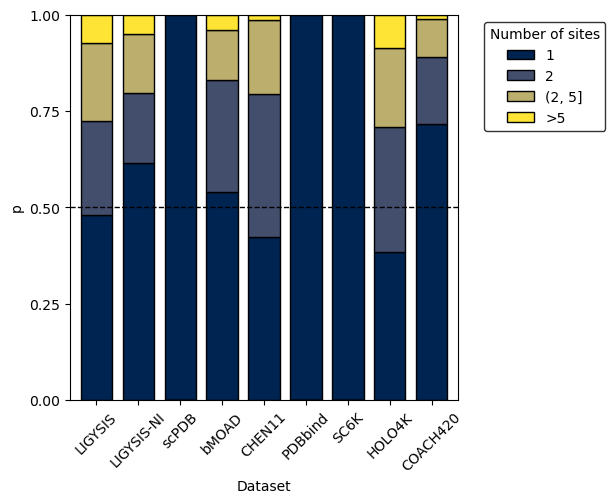

In [186]:
cmap = plt.cm.cividis

color1 = cmap(0.01)
color2 = cmap(0.25)
color3 = cmap(0.75)
color4 = cmap(0.99)

colors = [color1, color2, color3, color4]

# Convert dictionary to DataFrame
n_sites_df = convert_dict_to_df(master_n_sites_dict)

# Call the plotting function with custom parameters
bins = [0, 1, 2, 5, float('inf')]
labels = ['1', '2', '(2, 5]', '>5']
d = plot_discretised_distribution(n_sites_df, 'value', bins, labels, my_order, palette = colors, leg_title = "Number of sites", FSIZE = (5,5), DPI = 100,
                                 #out = "./figs/DATASET_COMP_number_sites.png"
                                 )

['LIGYSIS', 'LIGYSIS-NI', 'scPDB', 'bMOAD', 'CHEN11', 'PDBbind', 'SC6K', 'HOLO4K', 'COACH420']


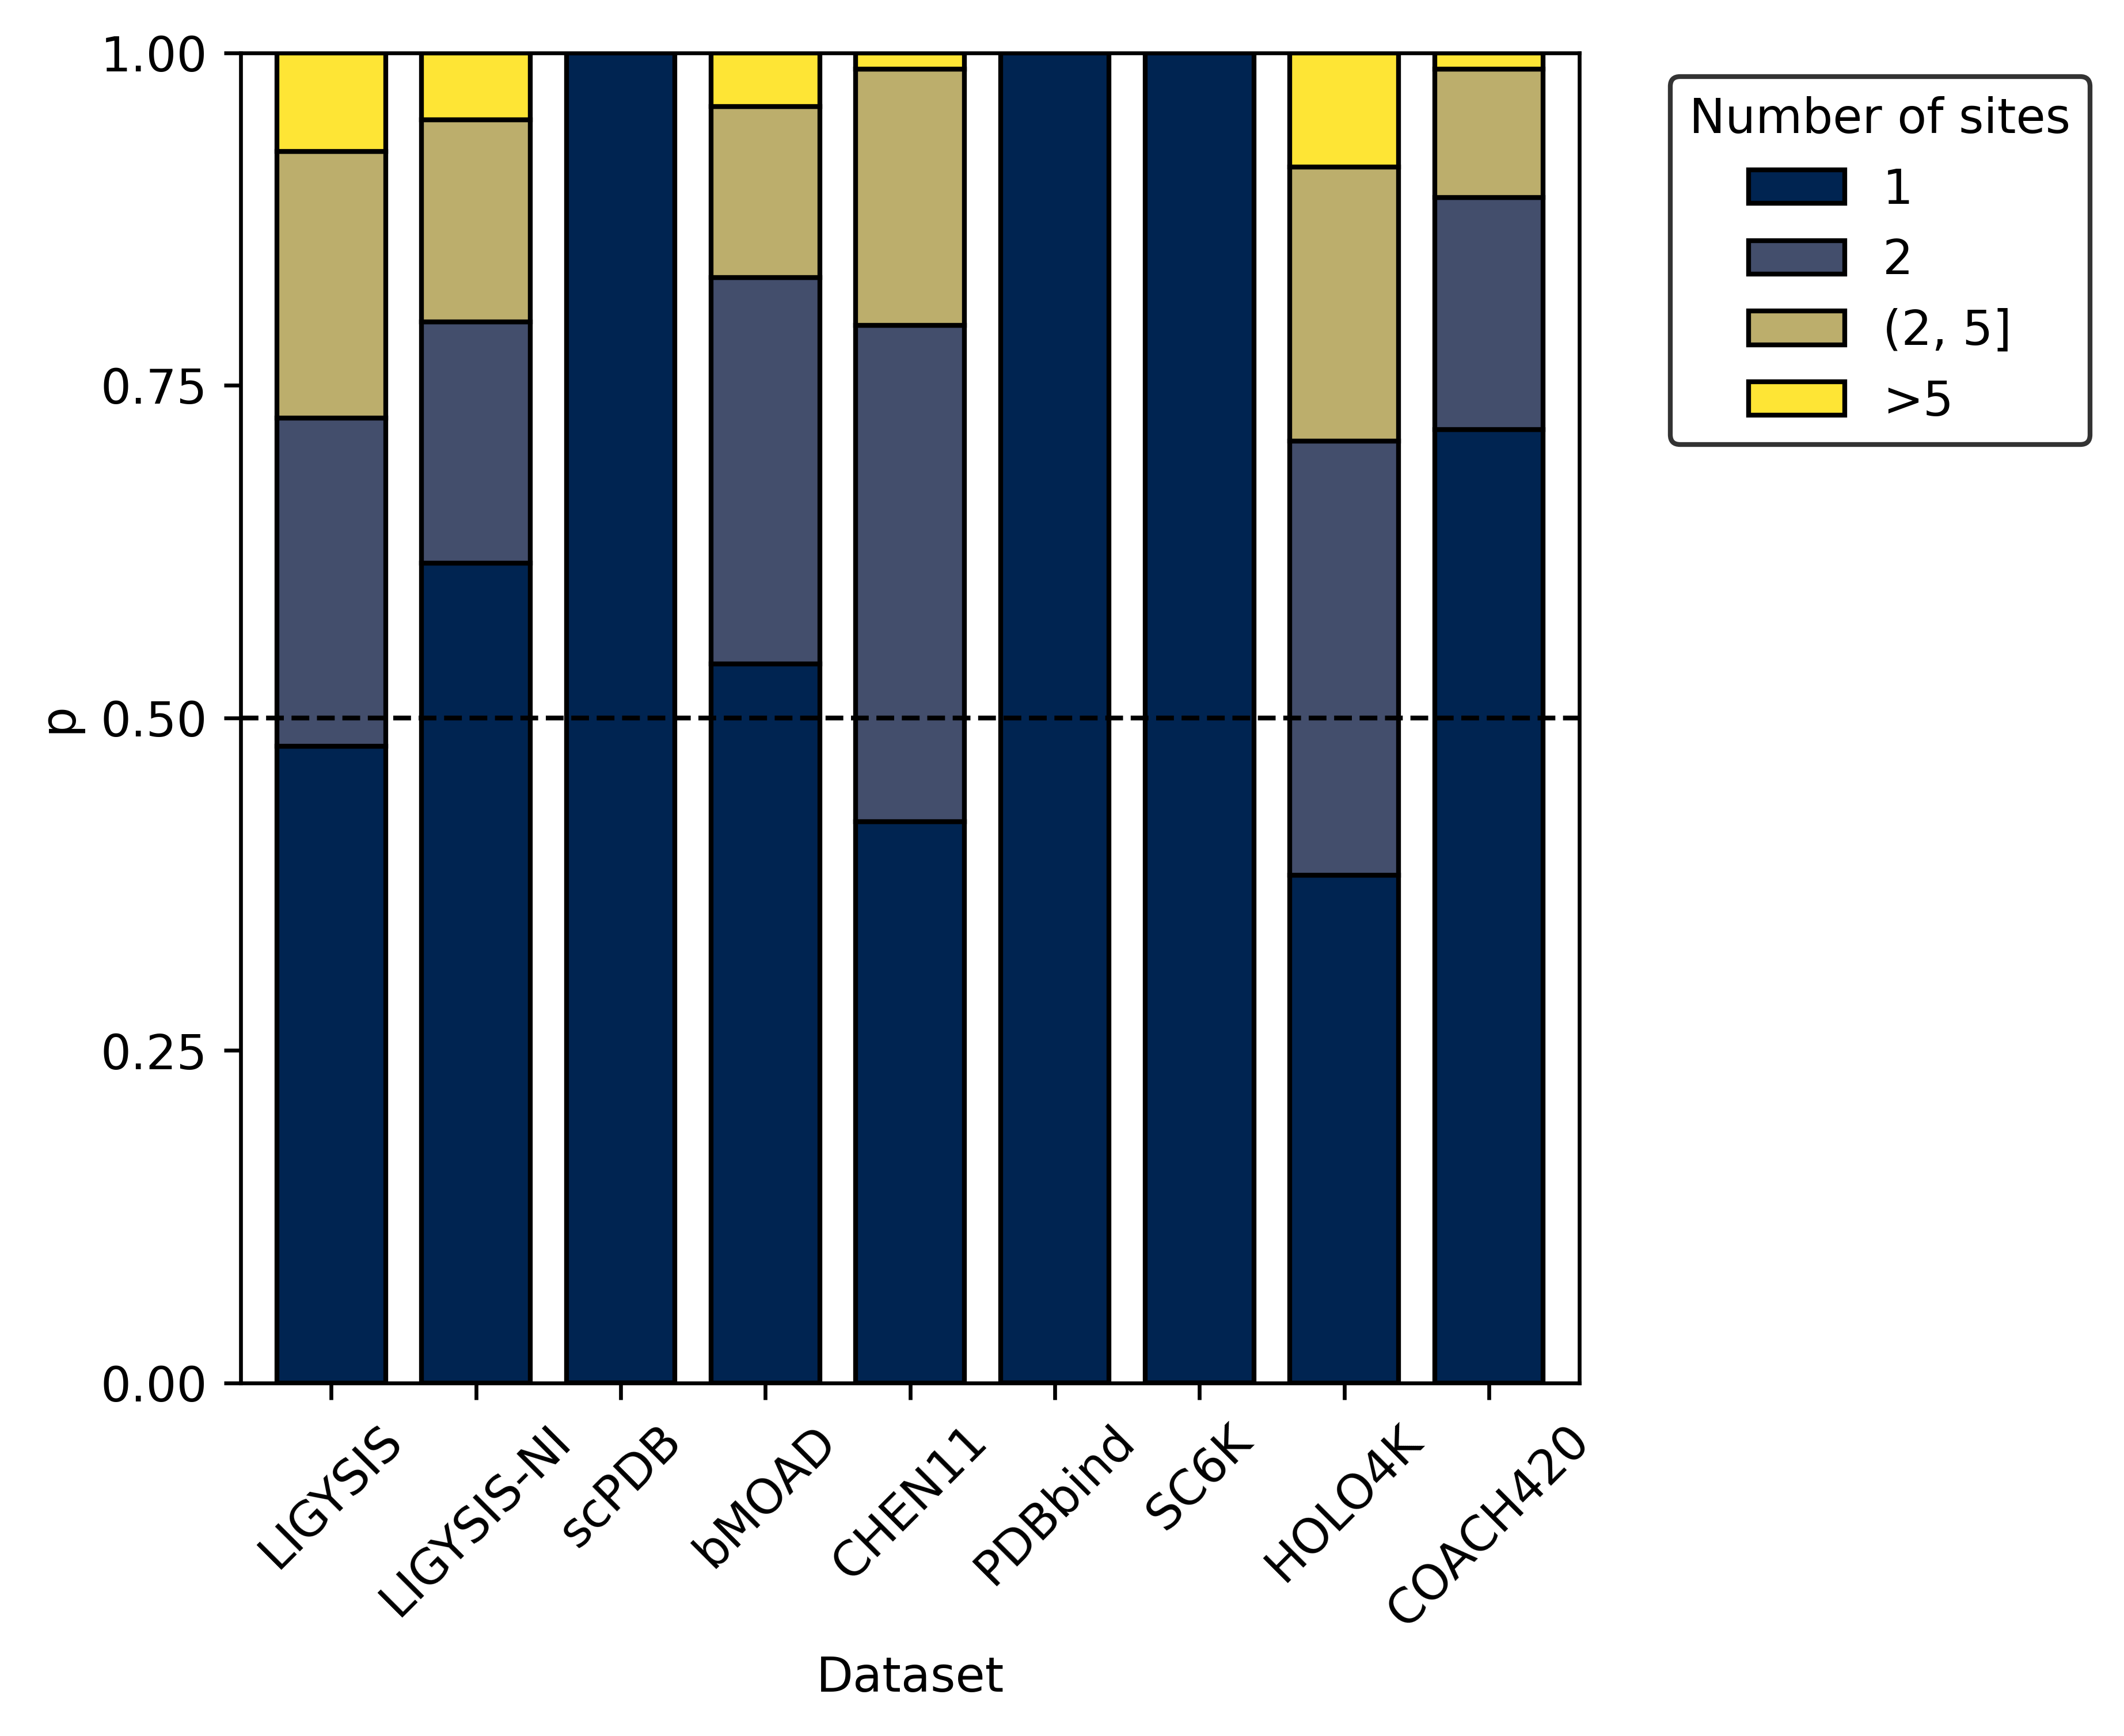

In [170]:
cmap = plt.cm.cividis

color1 = cmap(0.01)
color2 = cmap(0.25)
color3 = cmap(0.75)
color4 = cmap(0.99)

colors = [color1, color2, color3, color4]

# Convert dictionary to DataFrame
n_sites_df = convert_dict_to_df(master_n_sites_dict)

# Call the plotting function with custom parameters
bins = [0, 1, 2, 5, float('inf')]
labels = ['1', '2', '(2, 5]', '>5']
d = plot_discretised_distribution(n_sites_df, 'value', bins, labels, my_order, palette = colors, leg_title = "Number of sites", FSIZE = (5,5), DPI = 600,
                                 out = "./figs/DATASET_COMP_number_sites.png")

## Number of interacting chains per ligand

In [187]:
print(round(100*master_n_chains_dict["LIGYSIS"].count(1)/len(master_n_chains_dict["LIGYSIS"]),2))
print(round(100*master_n_chains_dict["LIGYSIS-NI"].count(1)/len(master_n_chains_dict["LIGYSIS-NI"]),2))
print(round(100*master_n_chains_dict["scPDB"].count(1)/len(master_n_chains_dict["scPDB"]),2))
print(round(100*master_n_chains_dict["bMOAD"].count(1)/len(master_n_chains_dict["bMOAD"]),2))
print(round(100*master_n_chains_dict["CHEN11"].count(1)/len(master_n_chains_dict["CHEN11"]),2))
print(round(100*master_n_chains_dict["PDBbind"].count(1)/len(master_n_chains_dict["PDBbind"]),2))
print(round(100*master_n_chains_dict["SC6K"].count(1)/len(master_n_chains_dict["SC6K"]),2))
print(round(100*master_n_chains_dict["HOLO4K"].count(1)/len(master_n_chains_dict["HOLO4K"]),2)) #74.98 --> 74.16
print(round(100*master_n_chains_dict["COACH420"].count(1)/len(master_n_chains_dict["COACH420"]),2))

82.19
76.29
73.45
71.17
97.08
75.17
55.99
74.16
93.91


['LIGYSIS', 'LIGYSIS-NI', 'scPDB', 'bMOAD', 'CHEN11', 'PDBbind', 'SC6K', 'HOLO4K', 'COACH420']


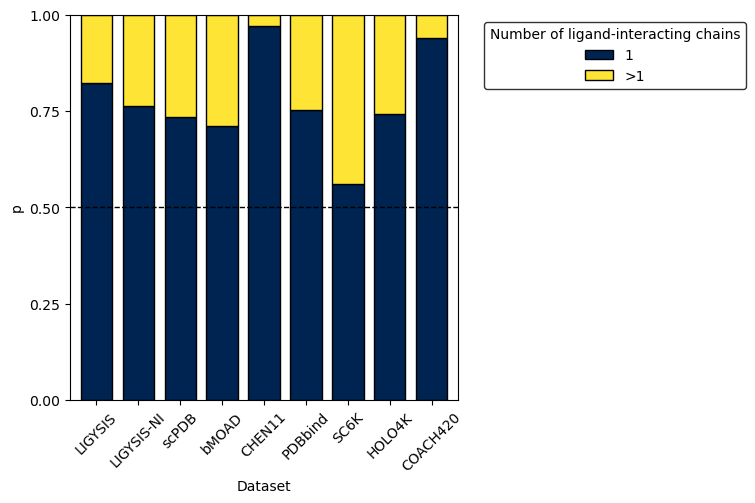

In [188]:
cmap = plt.cm.cividis

color1 = cmap(0.01)
color2 = cmap(0.25)
color3 = cmap(0.75)
color4 = cmap(0.99)

colors = [color1, color2, color3, color4]

# Convert dictionary to DataFrame
n_chains_per_lig_df = convert_dict_to_df(master_n_chains_dict)

# Call the plotting function with custom parameters
bins = [0, 1, float('inf')]
labels = ['1', '>1']
d = plot_discretised_distribution(n_chains_per_lig_df, 'value', bins, labels, my_order, palette = [colors[0], colors[-1]], leg_title = "Number of ligand-interacting chains", FSIZE = (5,5), DPI=100,
                                 #out = "./figs/DATASET_COMP_number_chains.png"
                                 )

['LIGYSIS', 'LIGYSIS-NI', 'scPDB', 'bMOAD', 'CHEN11', 'PDBbind', 'SC6K', 'HOLO4K', 'COACH420']


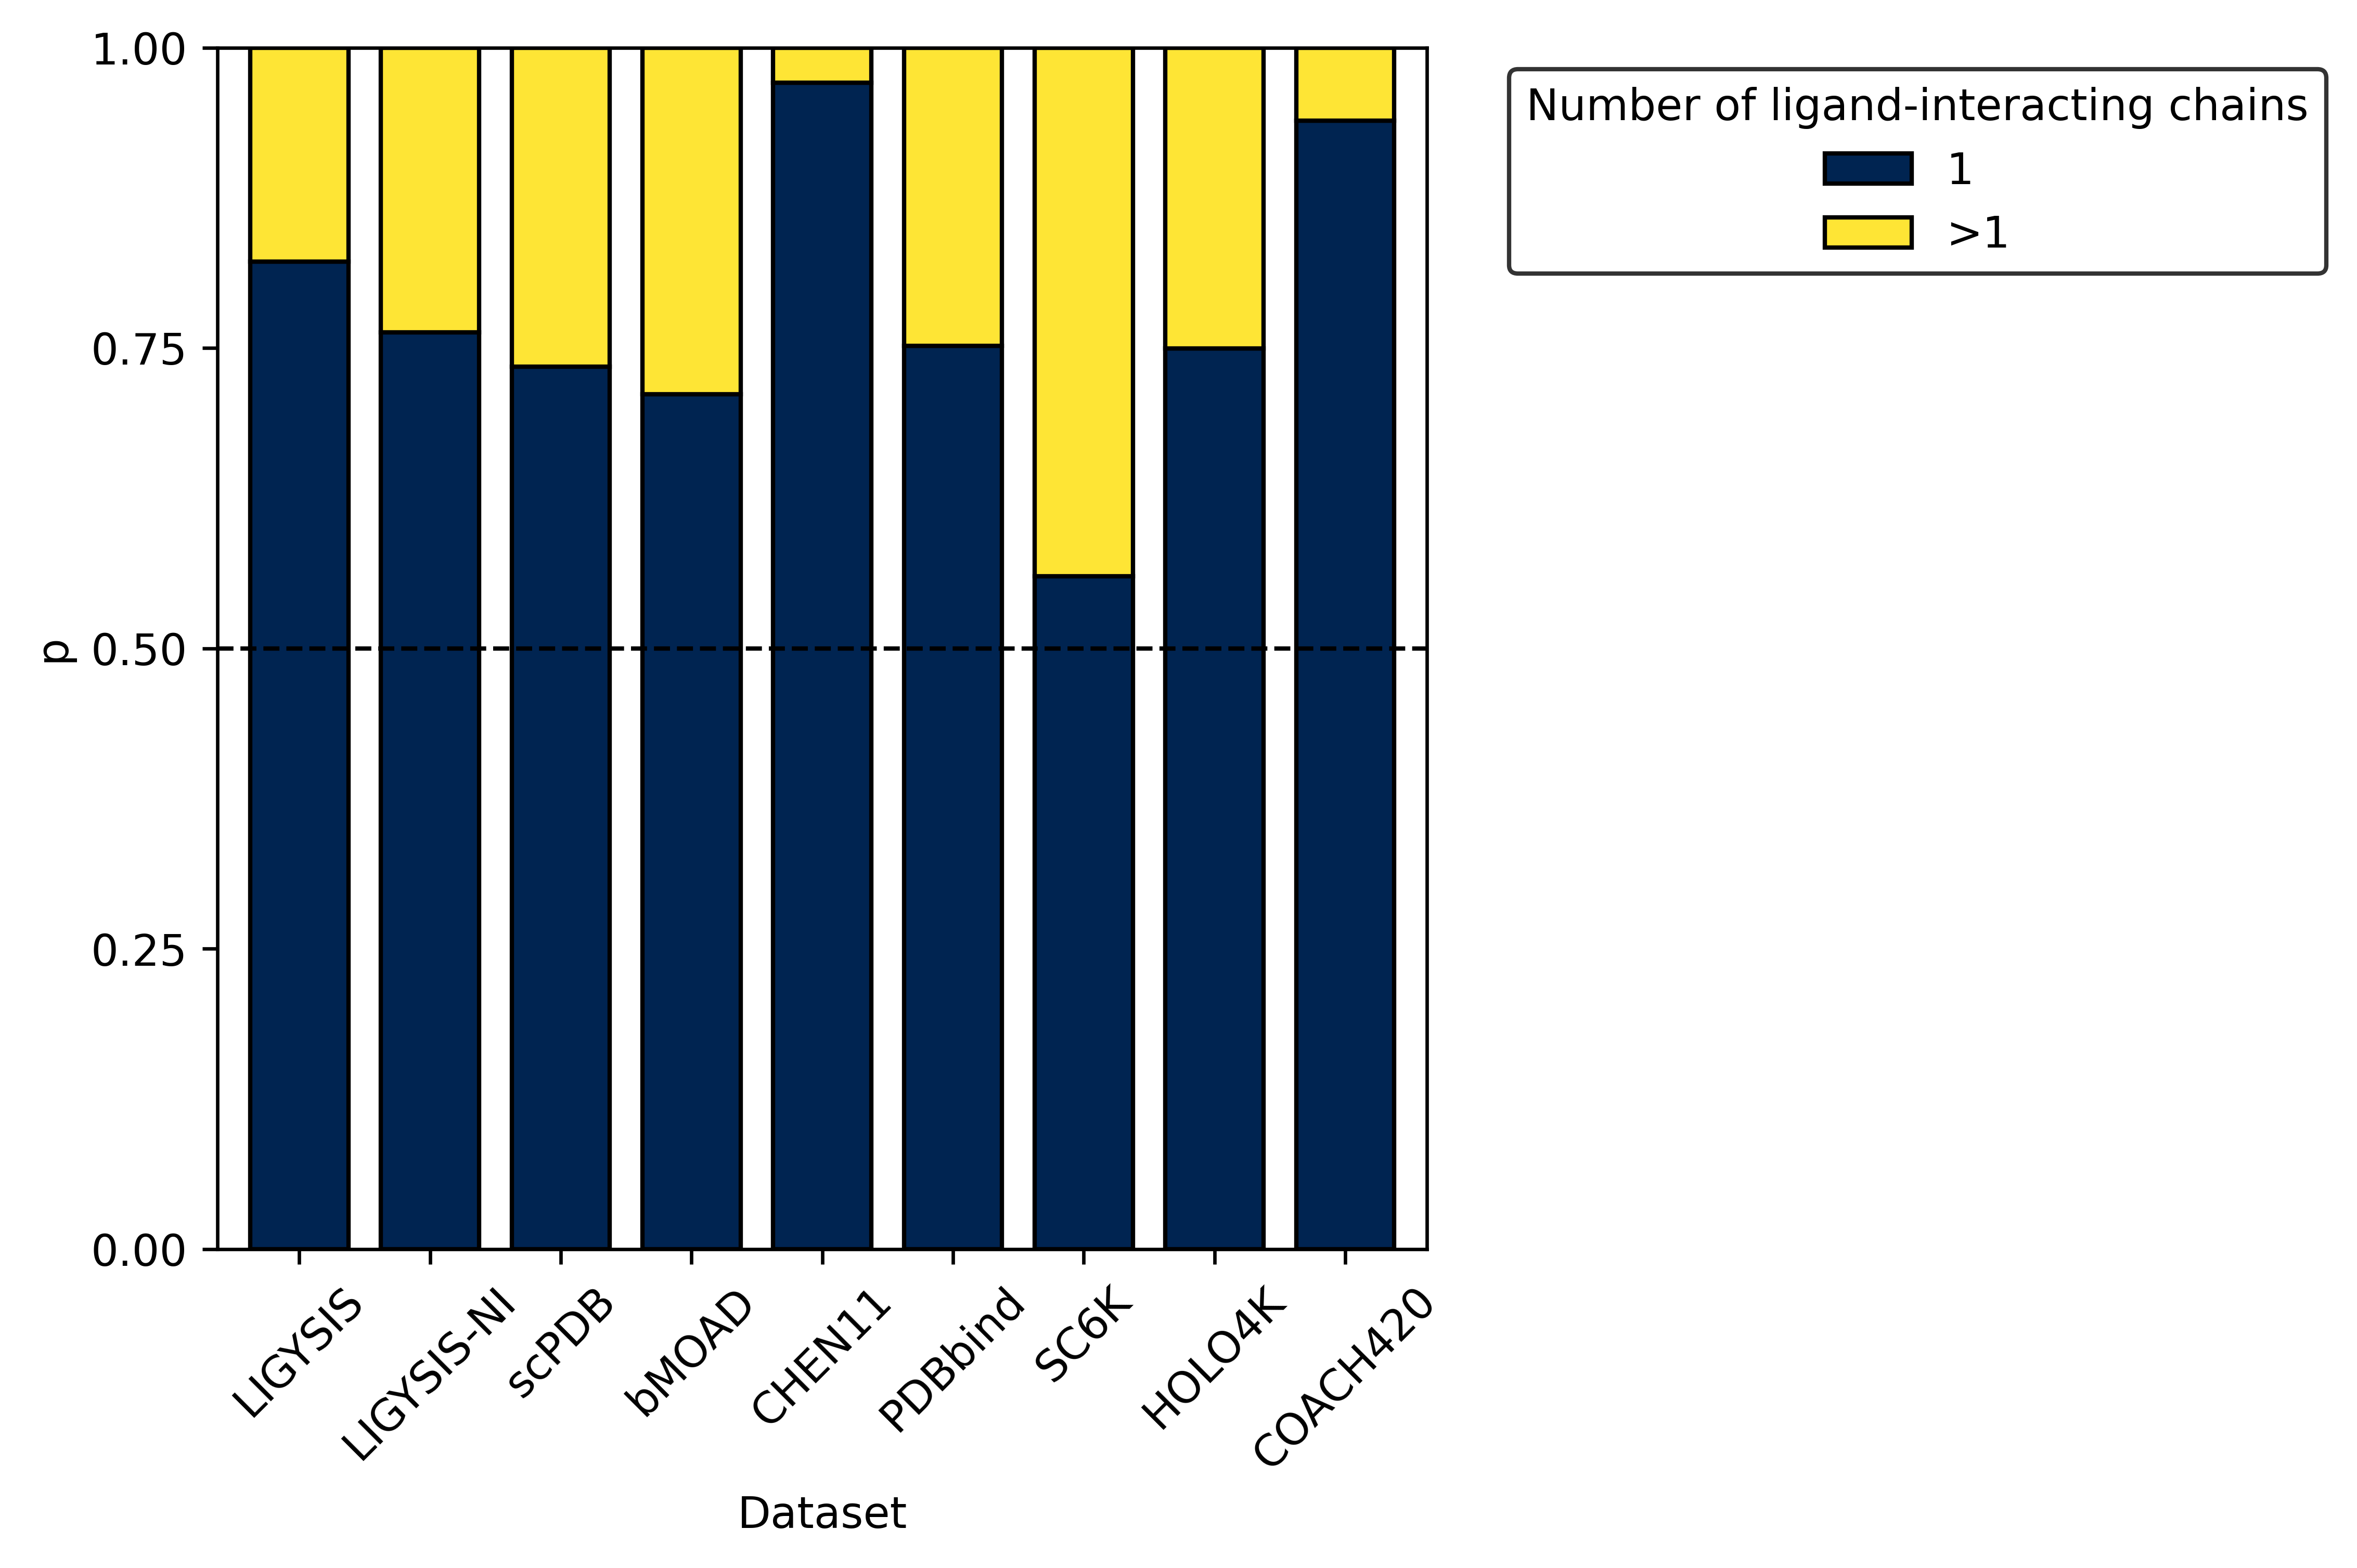

In [169]:
cmap = plt.cm.cividis

color1 = cmap(0.01)
color2 = cmap(0.25)
color3 = cmap(0.75)
color4 = cmap(0.99)

colors = [color1, color2, color3, color4]

# Convert dictionary to DataFrame
n_chains_per_lig_df = convert_dict_to_df(master_n_chains_dict)

# Call the plotting function with custom parameters
bins = [0, 1, float('inf')]
labels = ['1', '>1']
d = plot_discretised_distribution(n_chains_per_lig_df, 'value', bins, labels, my_order, palette = [colors[0], colors[-1]], leg_title = "Number of ligand-interacting chains", FSIZE = (5,5), DPI=600,
                                 out = "./figs/DATASET_COMP_number_chains.png"
                                 )

['LIGYSIS', 'LIGYSIS-NI', 'scPDB', 'bMOAD', 'CHEN11', 'PDBbind', 'SC6K', 'HOLO4K', 'COACH420']


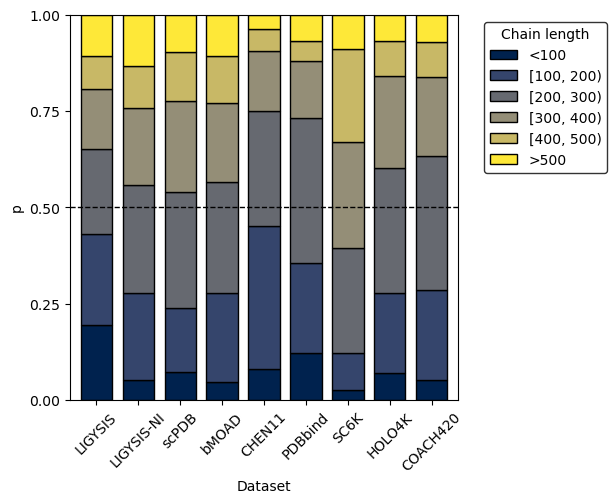

In [189]:
# Convert dictionary to DataFrame
chain_lens_df = convert_dict_to_df(master_chain_lens_dict)

# Call the plotting function with custom parameters
bins = [0, 100, 200, 300, 400, 500, float('inf')]
labels = ['<100', '[100, 200)', '[200, 300)', '[300, 400)', '[400, 500)', '>500']
a = plot_discretised_distribution(chain_lens_df, 'value', bins, labels, my_order, palette = get_color_range(len(labels), cmap), leg_title = "Chain length", FSIZE = (5,5), DPI = 100,
                                  #out = "./figs/DATASET_COMP_chain_lens.png"
                                 )

['LIGYSIS', 'LIGYSIS-NI', 'scPDB', 'bMOAD', 'CHEN11', 'PDBbind', 'SC6K', 'HOLO4K', 'COACH420']


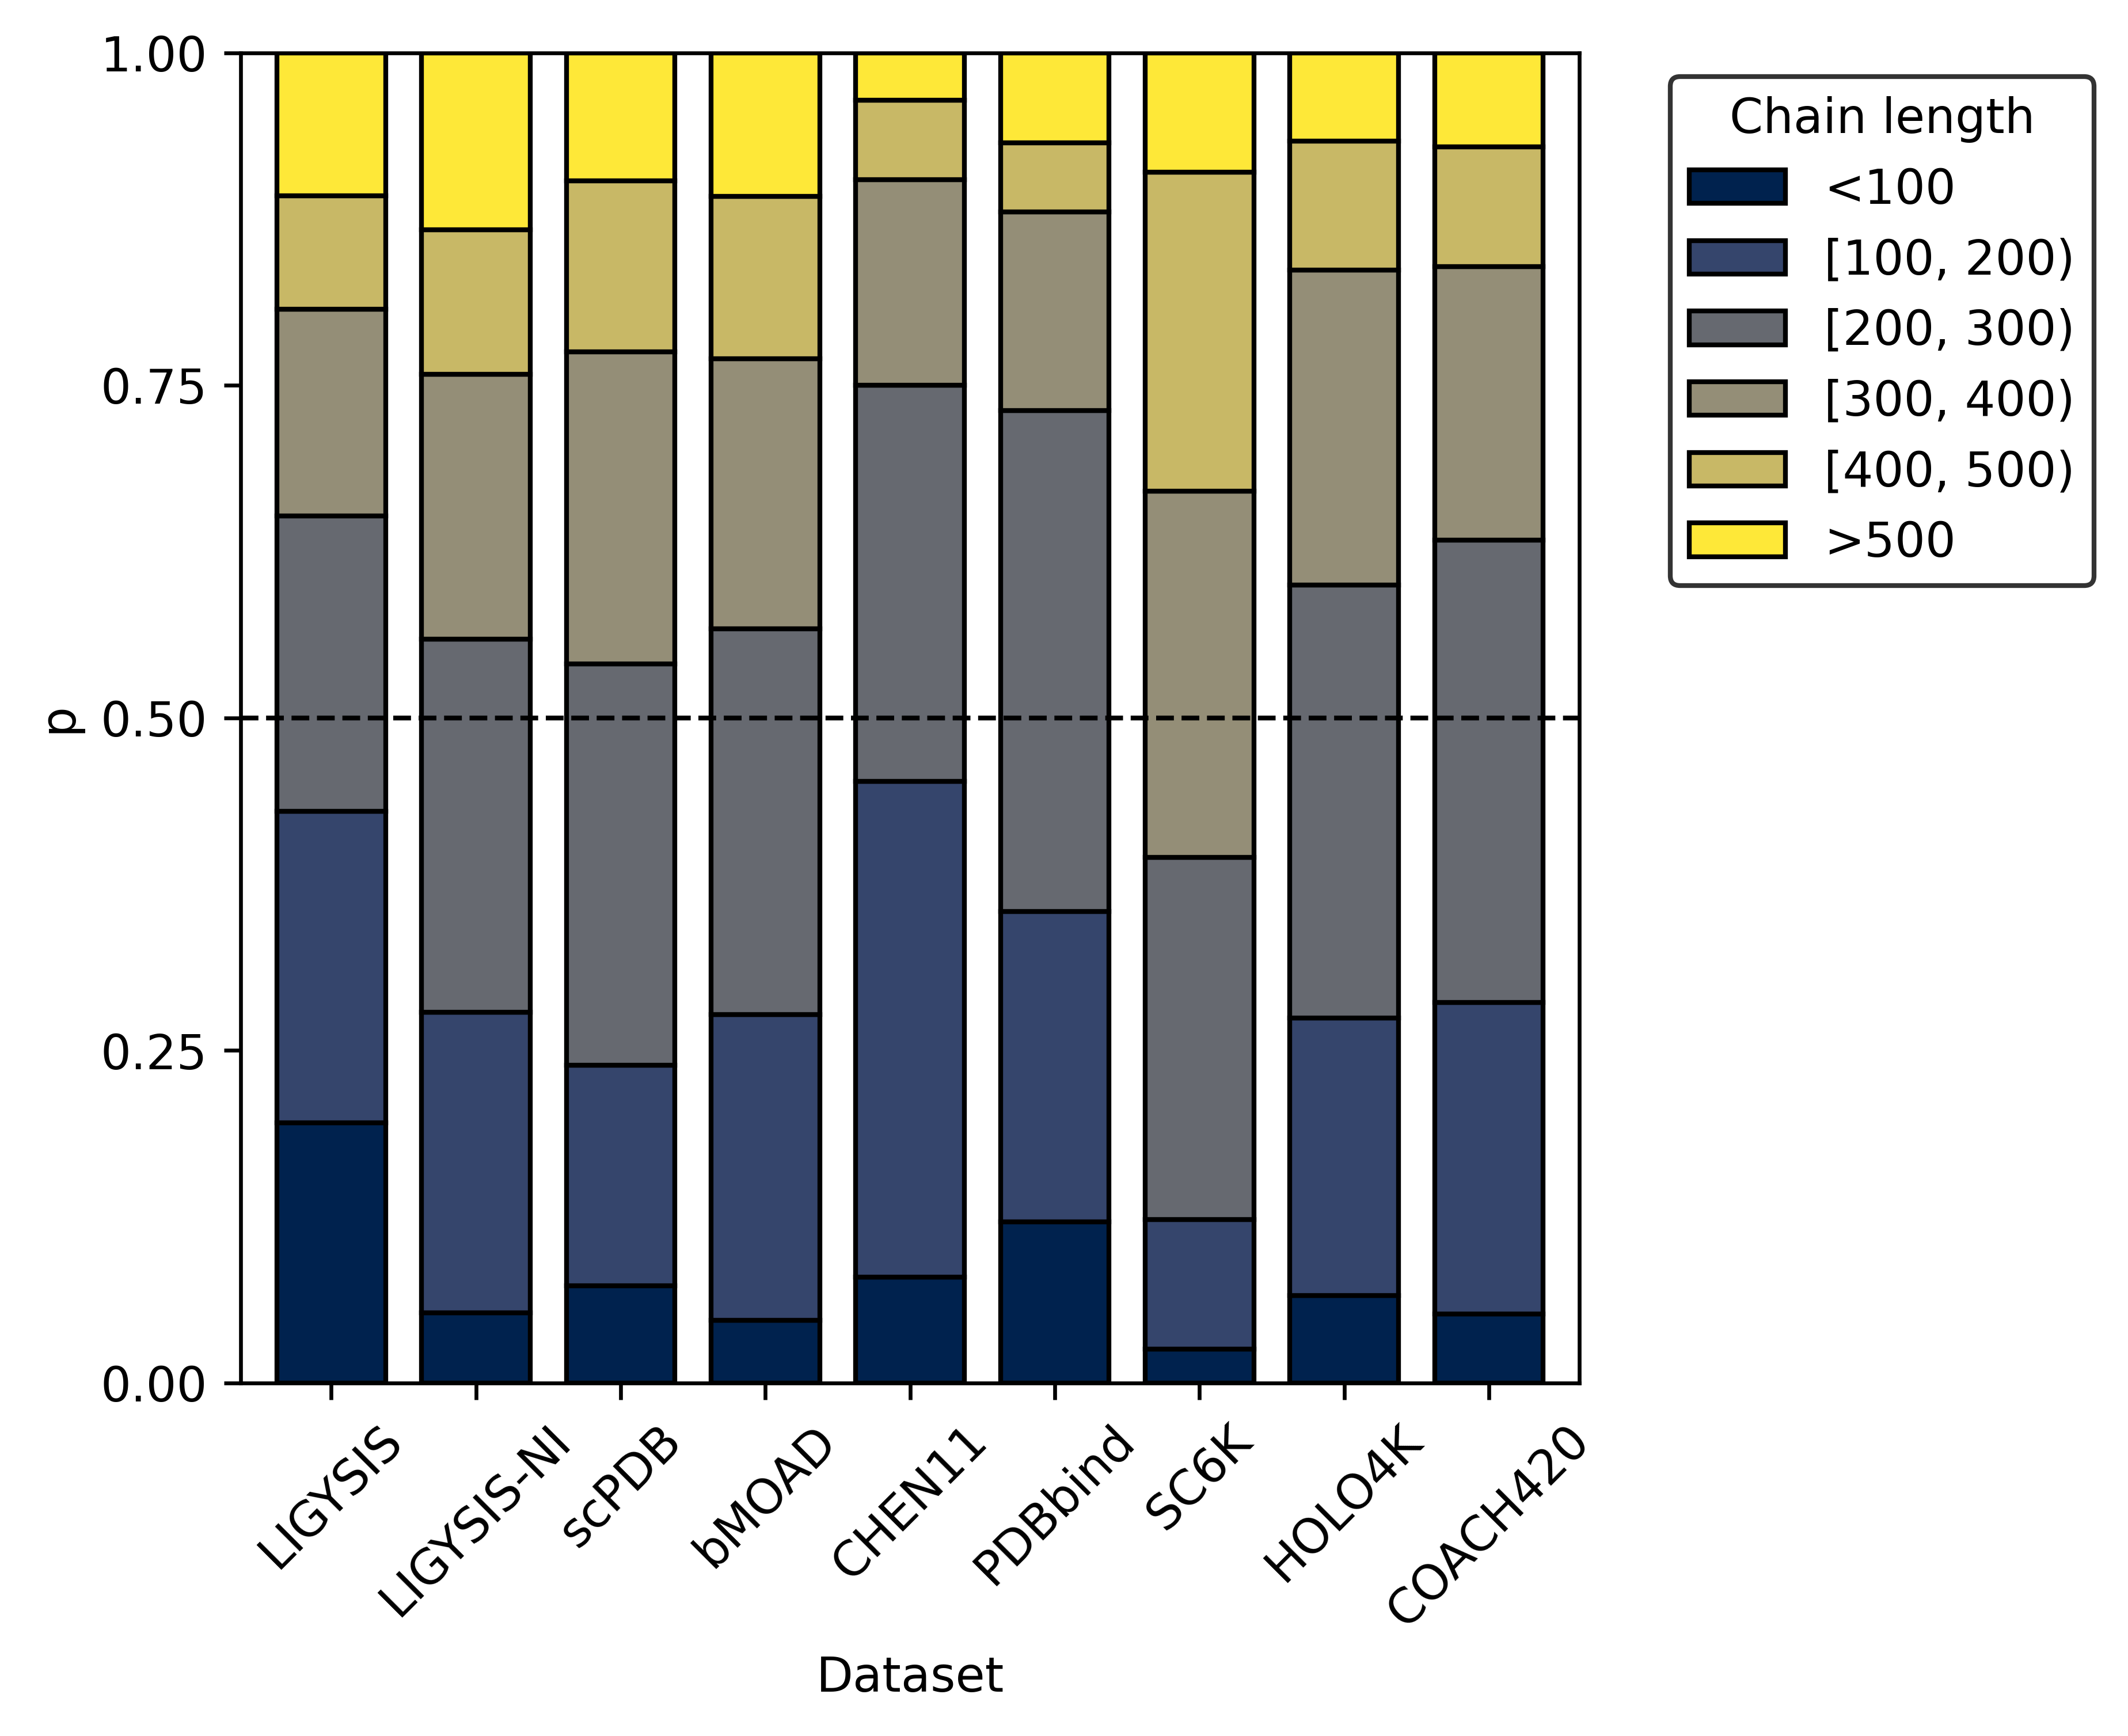

In [171]:
# Convert dictionary to DataFrame
chain_lens_df = convert_dict_to_df(master_chain_lens_dict)

# Call the plotting function with custom parameters
bins = [0, 100, 200, 300, 400, 500, float('inf')]
labels = ['<100', '[100, 200)', '[200, 300)', '[300, 400)', '[400, 500)', '>500']
a = plot_discretised_distribution(chain_lens_df, 'value', bins, labels, my_order, palette = get_color_range(len(labels), cmap), leg_title = "Chain length", FSIZE = (5,5), DPI = 600,
                                  out = "./figs/DATASET_COMP_chain_lens.png")

In [190]:
lig_n_atoms_dict = dict(zip(lig_data["id"],lig_data["n_atoms"]))

In [191]:
lig_data["type_generic"] = lig_data.type.map(molecule_mapping2)

In [192]:
lig_mol_type_dict = dict(zip(lig_data["id"],lig_data["type_generic"]))

In [193]:
# save_to_pickle(lig_n_atoms_dict, "./../DATA/lig_n_atoms_dict.pkl")
# save_to_pickle(lig_mol_type_dict, "./../DATA/lig_mol_type_dict.pkl")

In [194]:
lig_data[["id", "type_generic", "n_atoms"]].head(3)

,id,type_generic,n_atoms
0,000,Non-Polymer,9
1,001,Non-Polymer,87
2,002,Non-Polymer,67


In [195]:
not_in_dict = []
lig_types_dict_per_dataset = {}
ligs_dict_per_dataset = {}
for k, v in master_lig_names_dict.items():
    lig_types_dict_per_dataset[k] = []
    ligs_dict_per_dataset[k] = []
    for lig in v:
        try:
            lig_types_dict_per_dataset[k].append(lig_mol_type_dict[lig])
            ligs_dict_per_dataset[k].append(lig)
        except:
            if "mer" in lig:
                lig_types_dict_per_dataset[k].append("Peptide")
                ligs_dict_per_dataset[k].append(lig)
                continue
            subligs = ""
            if "-" in lig or "&" in lig:
                #print(lig)
                subligs = lig.split("-")
                if len(subligs) == 0:
                    subligs = lig.split("&")
                    
                if len(subligs) == 0:
                    subligs = lig.split("/")
                    
                if len(subligs) == 0:
                    subligs = lig.split("+")
                    
                if len(subligs) == 0:
                    
                    print(f'{k} {lig} not in dictionary!')
                    not_in_dict.append(lig)
                    continue
                sublig_types = []
                for sublig in subligs:
                    try:
                        sublig_types.append(lig_mol_type_dict[sublig])
                        #print(f'Found {sublig} type!')
                    except:
                        sublig_types.append(None)
                if len(set(sublig_types)) == 1:
                    if sublig_types[0] != None:
                        lig_types_dict_per_dataset[k].append(sublig_types[0])
                        ligs_dict_per_dataset[k].extend(subligs)
                        continue
                    else:
                        #print(f'{k} {lig} not in dictionary!')
                        not_in_dict.append(lig)
                        continue
            else:
                #print(f'{k} {lig} not in dictionary!')
                not_in_dict.append(lig)
                continue

In [196]:
#LIGYSIS_lig_types = [lig_mol_type_dict[lig] for lig in LIGYSIS_lig_names if lig not in ION_IDS]

In [197]:
LIGYSIS_un_lig_types = [lig_mol_type_dict[lig] for lig in LIGYSIS_lig_names_un]

LIGYSIS_un_lig_types_NI = [lig_mol_type_dict[lig] for lig in LIGYSIS_lig_names_un_NI]

In [198]:
lig_types_dict_per_dataset["LIGYSIS"] = LIGYSIS_un_lig_types
lig_types_dict_per_dataset["LIGYSIS-NI"] = LIGYSIS_un_lig_types_NI

In [199]:
for k, v in ligs_dict_per_dataset.items():
    print(k, len(v))

CHEN11 479
COACH420 624
HOLO4K 10175
JOINED 752
PDBbind 5295
SC6K 6147
bMOAD 11484
fptrain 309
scPDB 17594
scPDB_filt 5020


In [200]:
ligs_dict_per_dataset["LIGYSIS"] = LIGYSIS_lig_names_un
ligs_dict_per_dataset["LIGYSIS-NI"] = LIGYSIS_lig_names_un_NI

In [70]:
#lig_types_dict_per_dataset["LIGYSIS"] == lig_types_dict_per_dataset["LIGYSIS*"]

In [412]:
#not_in_dict_un = sorted(list(set(not_in_dict)))

In [88]:
#not_in_dict_un

['2SD',
 '3CU+GLC',
 '52I/52J',
 '53I/53J',
 '9D9&9DG',
 'ARY',
 'KDA&KDO',
 'KTS',
 'MFS',
 'MG5&SG5',
 'RVC/VCE',
 'UNF',
 '__N']

In [89]:
#lig_data.type_generic.value_counts()

Non-Polymer     36724
Peptide          2185
Saccharide       1127
Nucleic Acid      781
Other               1
Name: type_generic, dtype: int64

In [201]:
mol_types = ["Non-Polymer", "Saccharide", "Peptide", "Nucleic Acid"]
mol_types_counts = [frequency_count(lig_types_dict_per_dataset[dataset], mol_types) for dataset in my_order]

In [129]:
# print(round(100*lig_types_dict_per_dataset["LIGYSIS"].count("Nucleic Acid")/len(lig_types_dict_per_dataset["LIGYSIS"]),2))
# print(round(100*lig_types_dict_per_dataset["scPDB"].count("Saccharide")/len(lig_types_dict_per_dataset["scPDB"]),2))
# print(round(100*lig_types_dict_per_dataset["bMOAD"].count("Non-Polymer")/len(lig_types_dict_per_dataset["bMOAD"]),2))
# print(round(100*lig_types_dict_per_dataset["CHEN11"].count("Non-Polymer")/len(lig_types_dict_per_dataset["CHEN11"]),2))
# print(round(100*lig_types_dict_per_dataset["PDBbind"].count("Non-Polymer")/len(lig_types_dict_per_dataset["PDBbind"]),2))
# print(round(100*lig_types_dict_per_dataset["SC6K"].count("Saccharide")/len(lig_types_dict_per_dataset["SC6K"]),2))
# print(round(100*lig_types_dict_per_dataset["HOLO4K"].count("Non-Polymer")/len(lig_types_dict_per_dataset["HOLO4K"]),2))
# print(round(100*lig_types_dict_per_dataset["COACH420"].count("Non-Polymer")/len(lig_types_dict_per_dataset["COACH420"]),2))

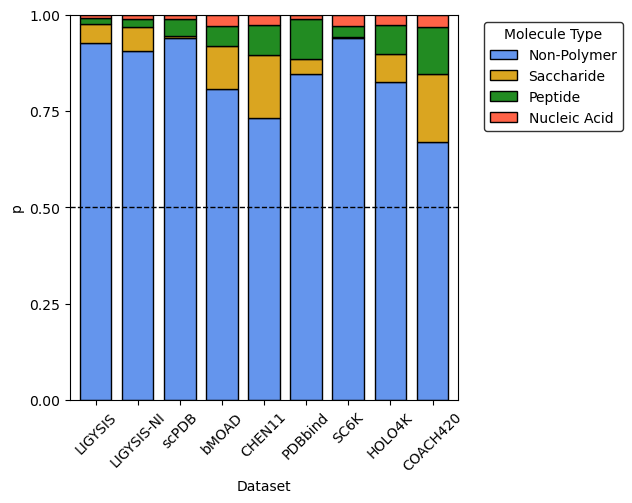

In [202]:
colors = ["cornflowerblue", "goldenrod", "forestgreen", "tomato"]
plot_normalised_stacked_bar(
    mol_types_counts, mol_types, my_order,
    legend_title = "Molecule Type", colors = colors, DPI = 100,
    #out = "./figs/DATASET_COMP_lig_types.png"
)

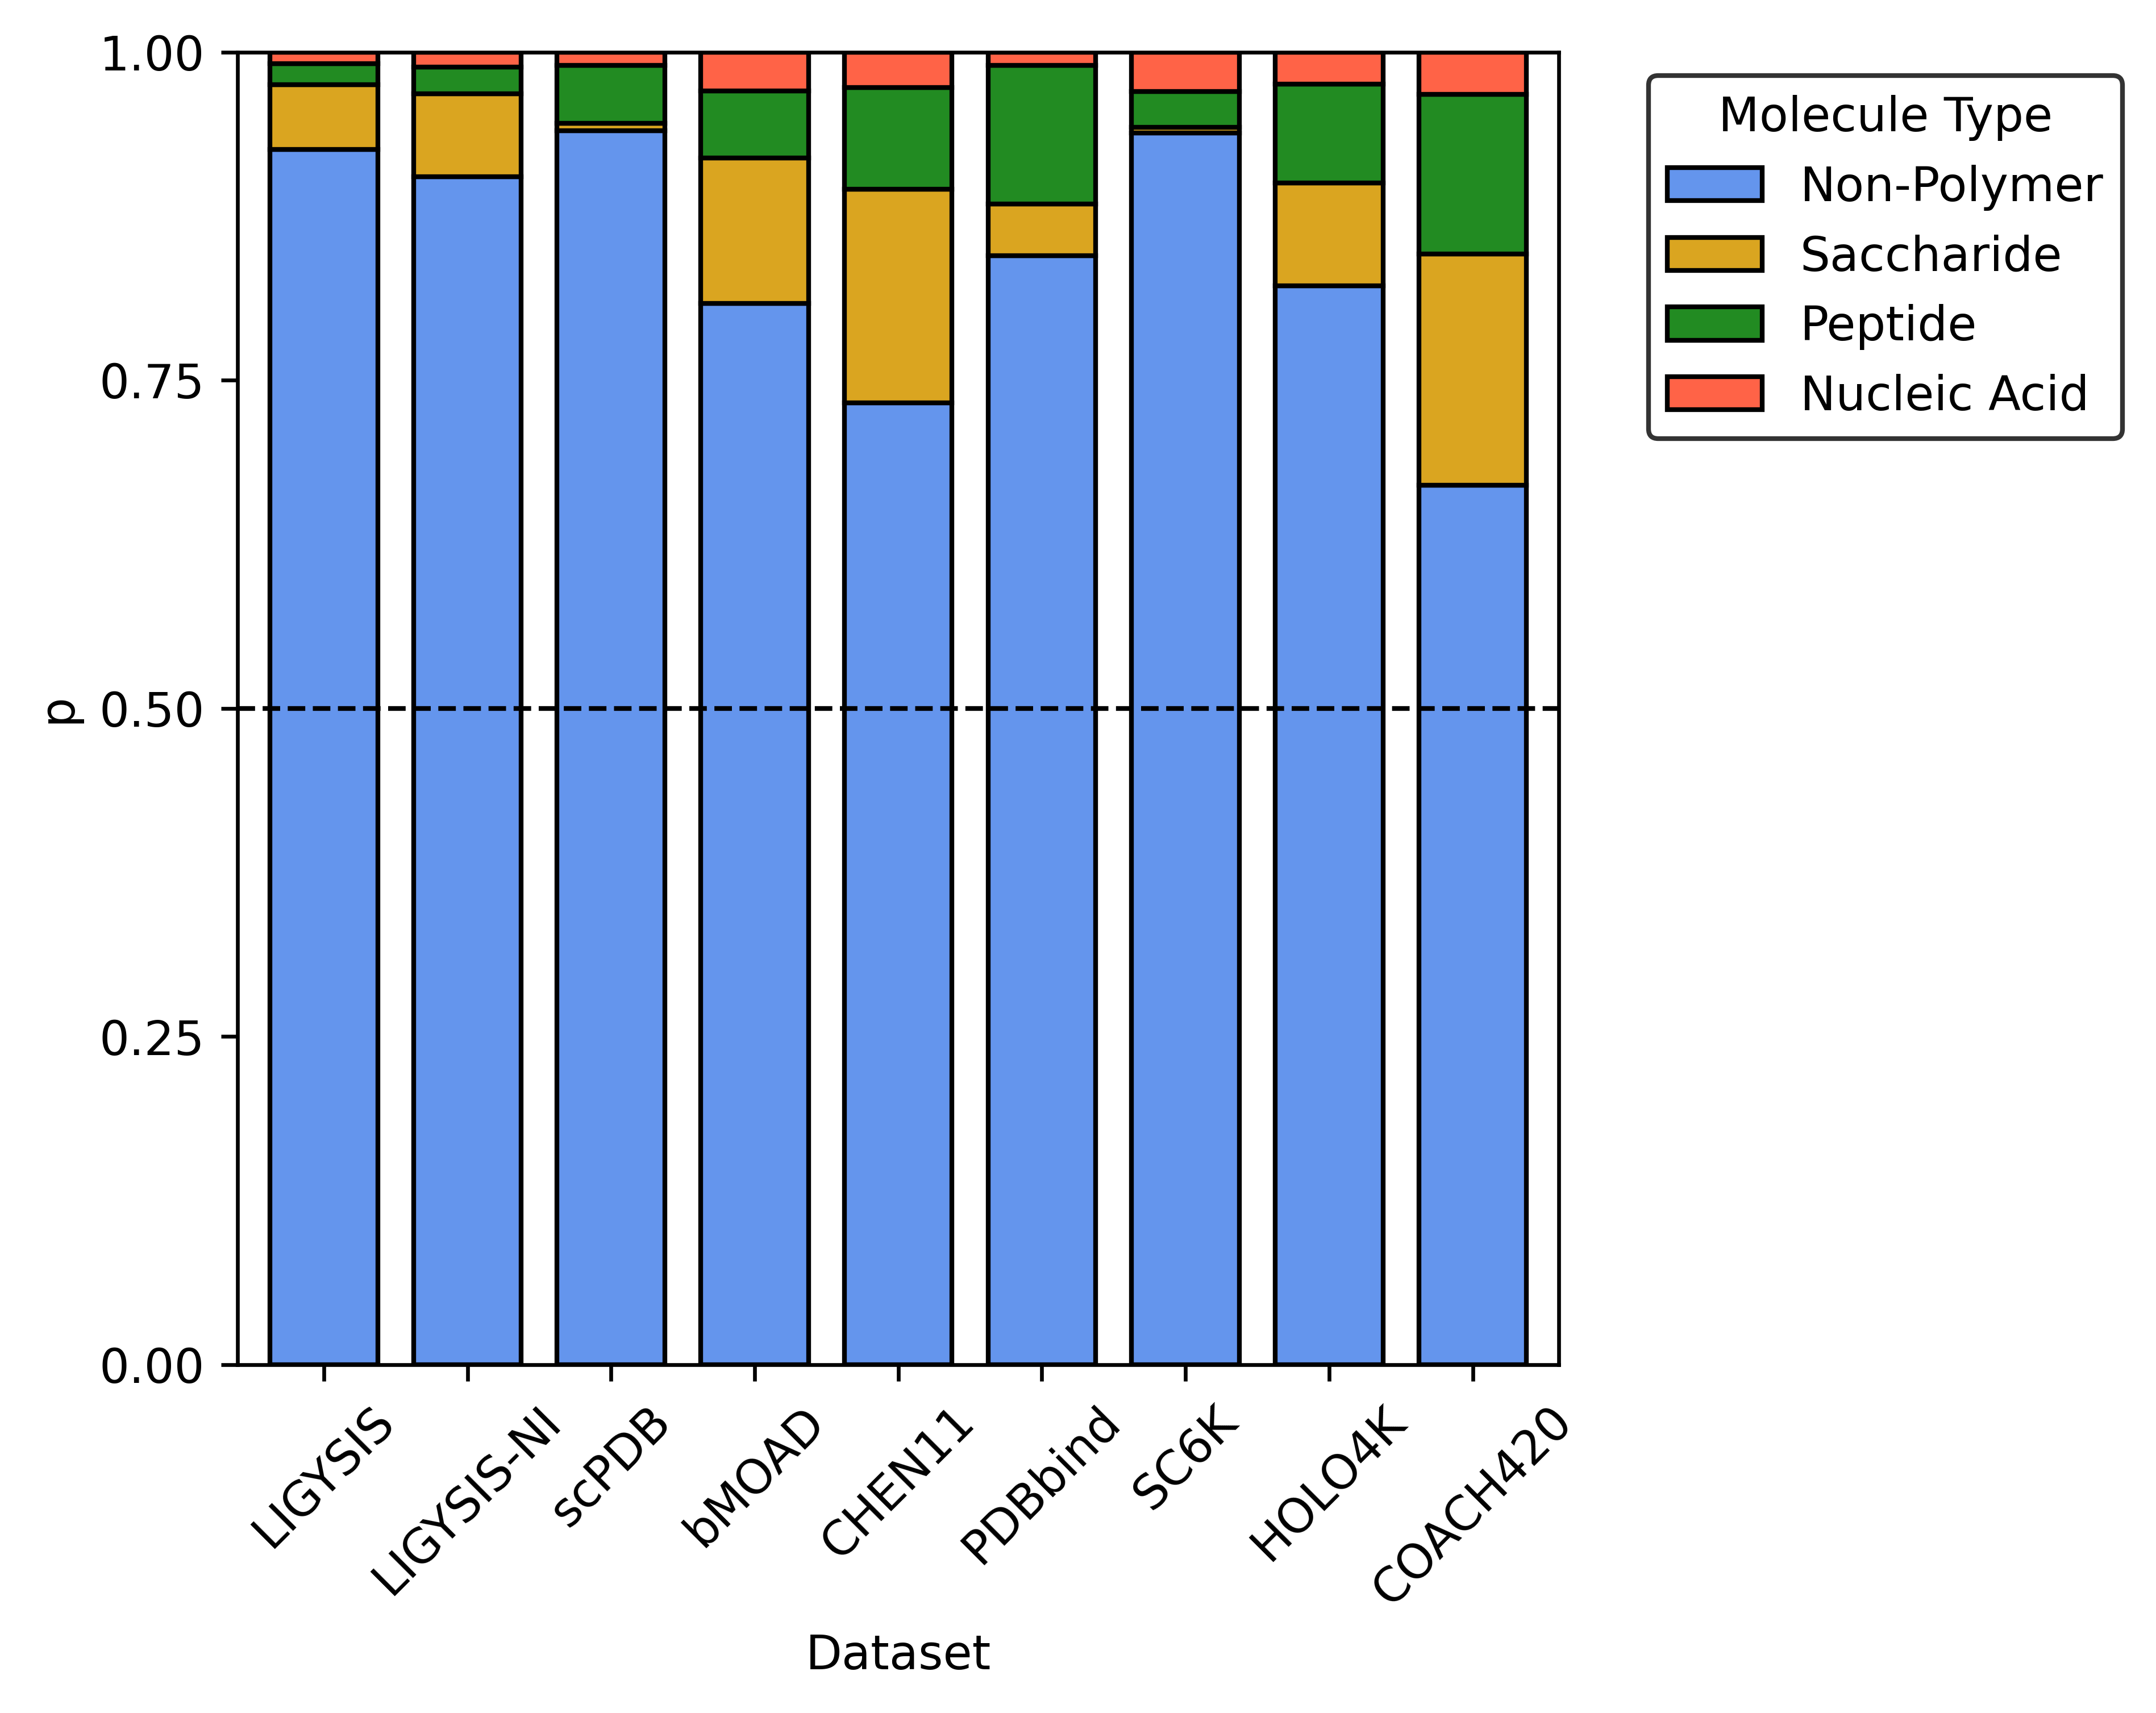

In [82]:
colors = ["cornflowerblue", "goldenrod", "forestgreen", "tomato"]
plot_normalised_stacked_bar(
    mol_types_counts, mol_types, my_order,
    legend_title = "Molecule Type", colors = colors, DPI = 600,
    out = "./figs/DATASET_COMP_lig_types.png"
)

In [206]:
lig_n_atoms_dict_per_dataset = {}
for k, v in master_lig_names_dict.items():
    lig_n_atoms_dict_per_dataset[k] = []
    for lig in v:
        # if k == "LIGYSIS":
        #     if lig in ION_IDS:
        #         continue
        try:
            lig_n_atoms_dict_per_dataset[k].append(lig_n_atoms_dict[lig])
        except:
            if "mer" in lig:
                lig_n_atoms_dict_per_dataset[k].append(estimate_atoms_in_peptide(lig))
            else:
                print(f'{lig} not in dictionary!')
                continue

035-036 not in dictionary!
53I/53J not in dictionary!
XDN-XYP not in dictionary!
XIF-XYP not in dictionary!
3CU+GLC not in dictionary!
52I/52J not in dictionary!
EDG-AHR not in dictionary!
KTS not in dictionary!
NOY-BGC not in dictionary!
IFM-BGC not in dictionary!
NOJ-SO4 not in dictionary!
NAG-MBG not in dictionary!
SER-DNF not in dictionary!
MAN-IFM not in dictionary!
GLC-DMJ not in dictionary!
KDA&KDO not in dictionary!
KDA&KDO not in dictionary!
GLC-IFM not in dictionary!
TMX-CTO not in dictionary!
SLE-TYR not in dictionary!
ALX-BNX not in dictionary!
__N not in dictionary!
MG5&SG5 not in dictionary!
UDP-BGC not in dictionary!
GLA-MBG not in dictionary!
2SD not in dictionary!
IFM-SO4 not in dictionary!
XDL-XYP not in dictionary!
UNF not in dictionary!
GDP-7MG not in dictionary!
GAL-MHD not in dictionary!
RVC/VCE not in dictionary!
MFS not in dictionary!
BGC-OXZ not in dictionary!
GLC-NOJ not in dictionary!
GAL-MGC not in dictionary!
9D9&9DG not in dictionary!
ARY not in dictionary

In [207]:
LIGYSIS_n_lig_atoms_un = [lig_n_atoms_dict[lig] for lig in LIGYSIS_lig_names_un]

LIGYSIS_n_lig_atoms_un_NI = [lig_n_atoms_dict[lig] for lig in LIGYSIS_lig_names_un_NI]

In [208]:
lig_n_atoms_dict_per_dataset["LIGYSIS"] = LIGYSIS_n_lig_atoms_un

lig_n_atoms_dict_per_dataset["LIGYSIS-NI"] = LIGYSIS_n_lig_atoms_un_NI

In [209]:
{k: v for k, v in lig_n_atoms_dict.items() if v < 1}

{'UNL': -1}

In [212]:
#lig_n_atoms_df.query('dataset == "LIGYSIS" & value == 1')

In [213]:
#lig_n_atoms_df.dataset.value_counts()

In [90]:
list(lig_n_atoms_dict_per_dataset.keys())

['CHEN11',
 'COACH420',
 'HOLO4K',
 'JOINED',
 'PDBbind',
 'SC6K',
 'bMOAD',
 'fptrain',
 'scPDB',
 'scPDB_filt',
 'LIGYSIS',
 'LIGYSIS*']

['LIGYSIS', 'LIGYSIS-NI', 'scPDB', 'bMOAD', 'CHEN11', 'PDBbind', 'SC6K', 'HOLO4K', 'COACH420']


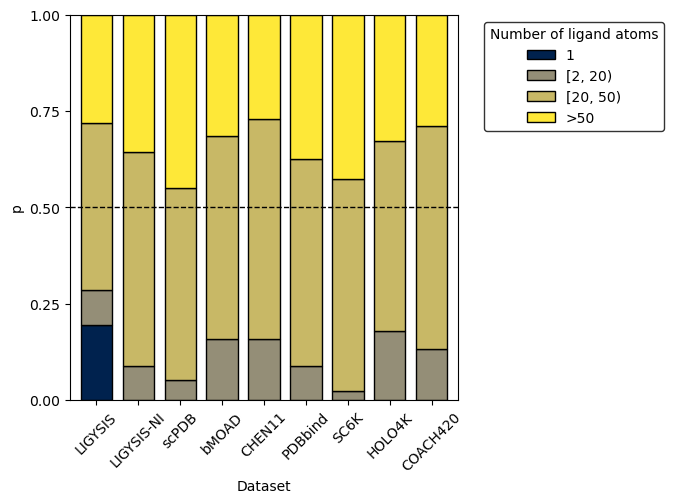

In [214]:
cmap = plt.cm.cividis

color1 = cmap(-1)
color2 = cmap(0.6)
color3 = cmap(0.8)
color4 = cmap(0.9999)

colors = [color1, color2, color3, color4]
lig_n_atoms_df = convert_dict_to_df(lig_n_atoms_dict_per_dataset) 

bins = [0, 1, 20, 50, float('inf')]

labels = ['1', '[2, 20)', '[20, 50)','>50']

a = plot_discretised_distribution(
    lig_n_atoms_df, 'value', bins, labels, my_order,
    palette = colors,
    leg_title = "Number of ligand atoms",
    FSIZE = (5,5), DPI = 100,
    #out = "./figs/DATASET_COMP_lig_size.png"
)

['LIGYSIS', 'LIGYSIS-NI', 'scPDB', 'bMOAD', 'CHEN11', 'PDBbind', 'SC6K', 'HOLO4K', 'COACH420']


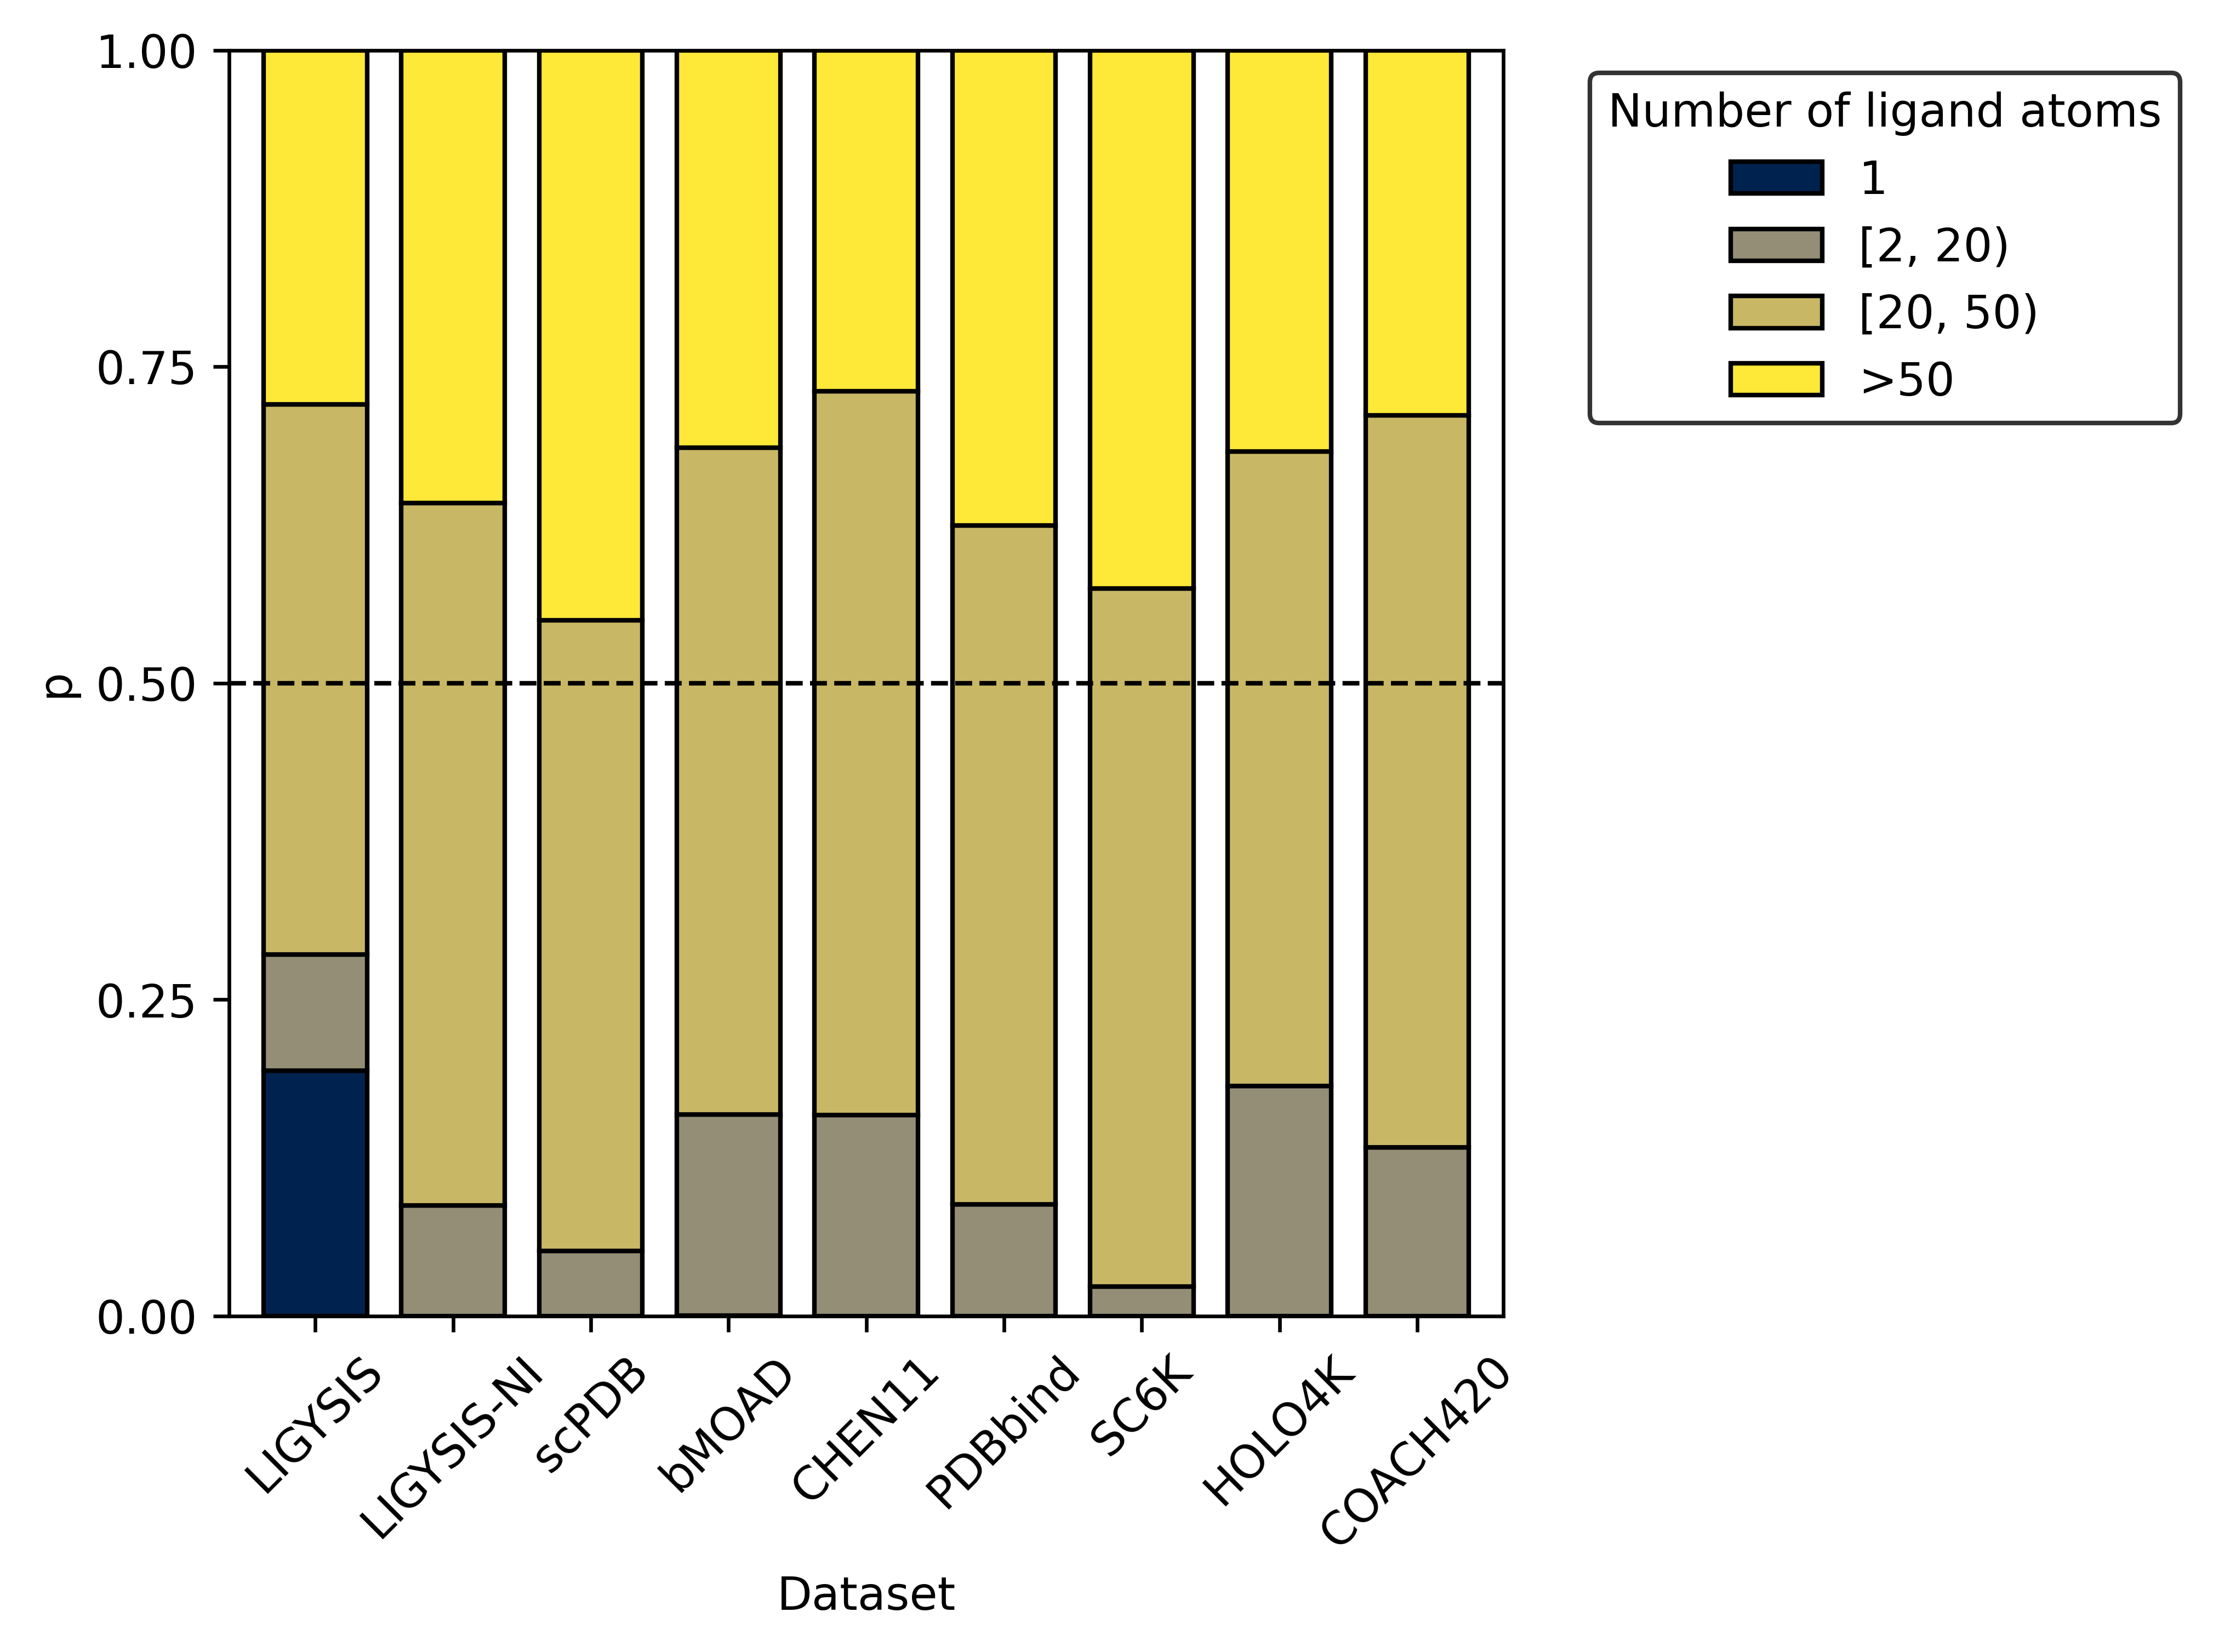

In [174]:
cmap = plt.cm.cividis

color1 = cmap(-1)
color2 = cmap(0.6)
color3 = cmap(0.8)
color4 = cmap(0.9999)

colors = [color1, color2, color3, color4]
lig_n_atoms_df = convert_dict_to_df(lig_n_atoms_dict_per_dataset) 

bins = [0, 1, 20, 50, float('inf')]

labels = ['1', '[2, 20)', '[20, 50)','>50']

a = plot_discretised_distribution(
    lig_n_atoms_df, 'value', bins, labels, my_order,
    palette = colors,
    leg_title = "Number of ligand atoms",
    FSIZE = (5,5), DPI = 600,
    out = "./figs/DATASET_COMP_lig_size.png"
)

### Binding site size (# aas)

In [140]:
"#440154","#3b528b","#21918c","#5ec962","#fde725"

('#440154', '#3b528b', '#21918c', '#5ec962', '#fde725')

In [250]:
round(100*(1623/4572),2)

35.5

In [253]:
round(100*(4581/8244),2)

55.57

In [252]:
n_aas_per_site_df.query('dataset == "LIGYSIS"')

,dataset,value
59253,LIGYSIS,61
59254,LIGYSIS,18
59255,LIGYSIS,5
59256,LIGYSIS,27
59257,LIGYSIS,22
...,...,...
67492,LIGYSIS,8
67493,LIGYSIS,12
67494,LIGYSIS,5
67495,LIGYSIS,4


['LIGYSIS', 'LIGYSIS-NI', 'scPDB', 'bMOAD', 'CHEN11', 'PDBbind', 'SC6K', 'HOLO4K', 'COACH420']


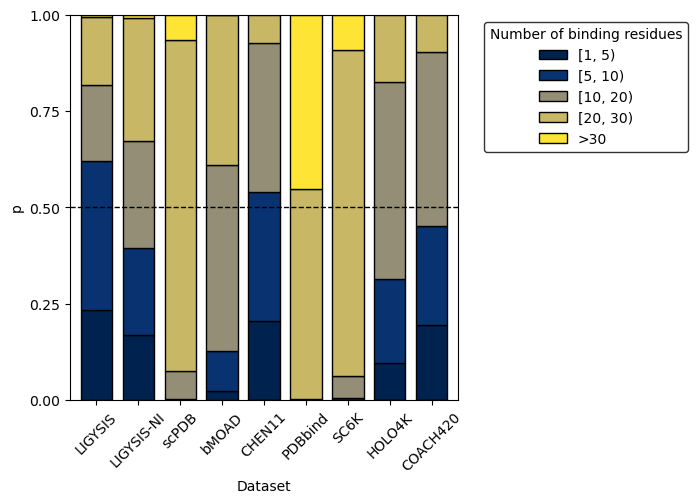

In [215]:
# Convert dictionary to DataFrame
n_aas_per_site_df = convert_dict_to_df(master_n_aas_sites_dict)

# Call the plotting function with custom parameters
bins = [0, 5, 10, 20, 50, float('inf')]

labels = ['[1, 5)', '[5, 10)', '[10, 20)', '[20, 30)','>30']

color1 = cmap(-1)
color2 = cmap(0.1)
color3 = cmap(0.6)
color4 = cmap(0.8)
color5 = cmap(0.99)

colors = [color1, color2, color3, color4, color5]
#colors = ["#000004","#51127c","#b73779","#fc8961","#fcfdbf"]
a = plot_discretised_distribution(
    n_aas_per_site_df, 'value', bins, labels, my_order,
    palette = colors,
    leg_title = "Number of binding residues", FSIZE = (5,5), DPI = 100,
    #out = "./figs/DATASET_COMP_site_size.png"
)

['LIGYSIS', 'LIGYSIS-NI', 'scPDB', 'bMOAD', 'CHEN11', 'PDBbind', 'SC6K', 'HOLO4K', 'COACH420']


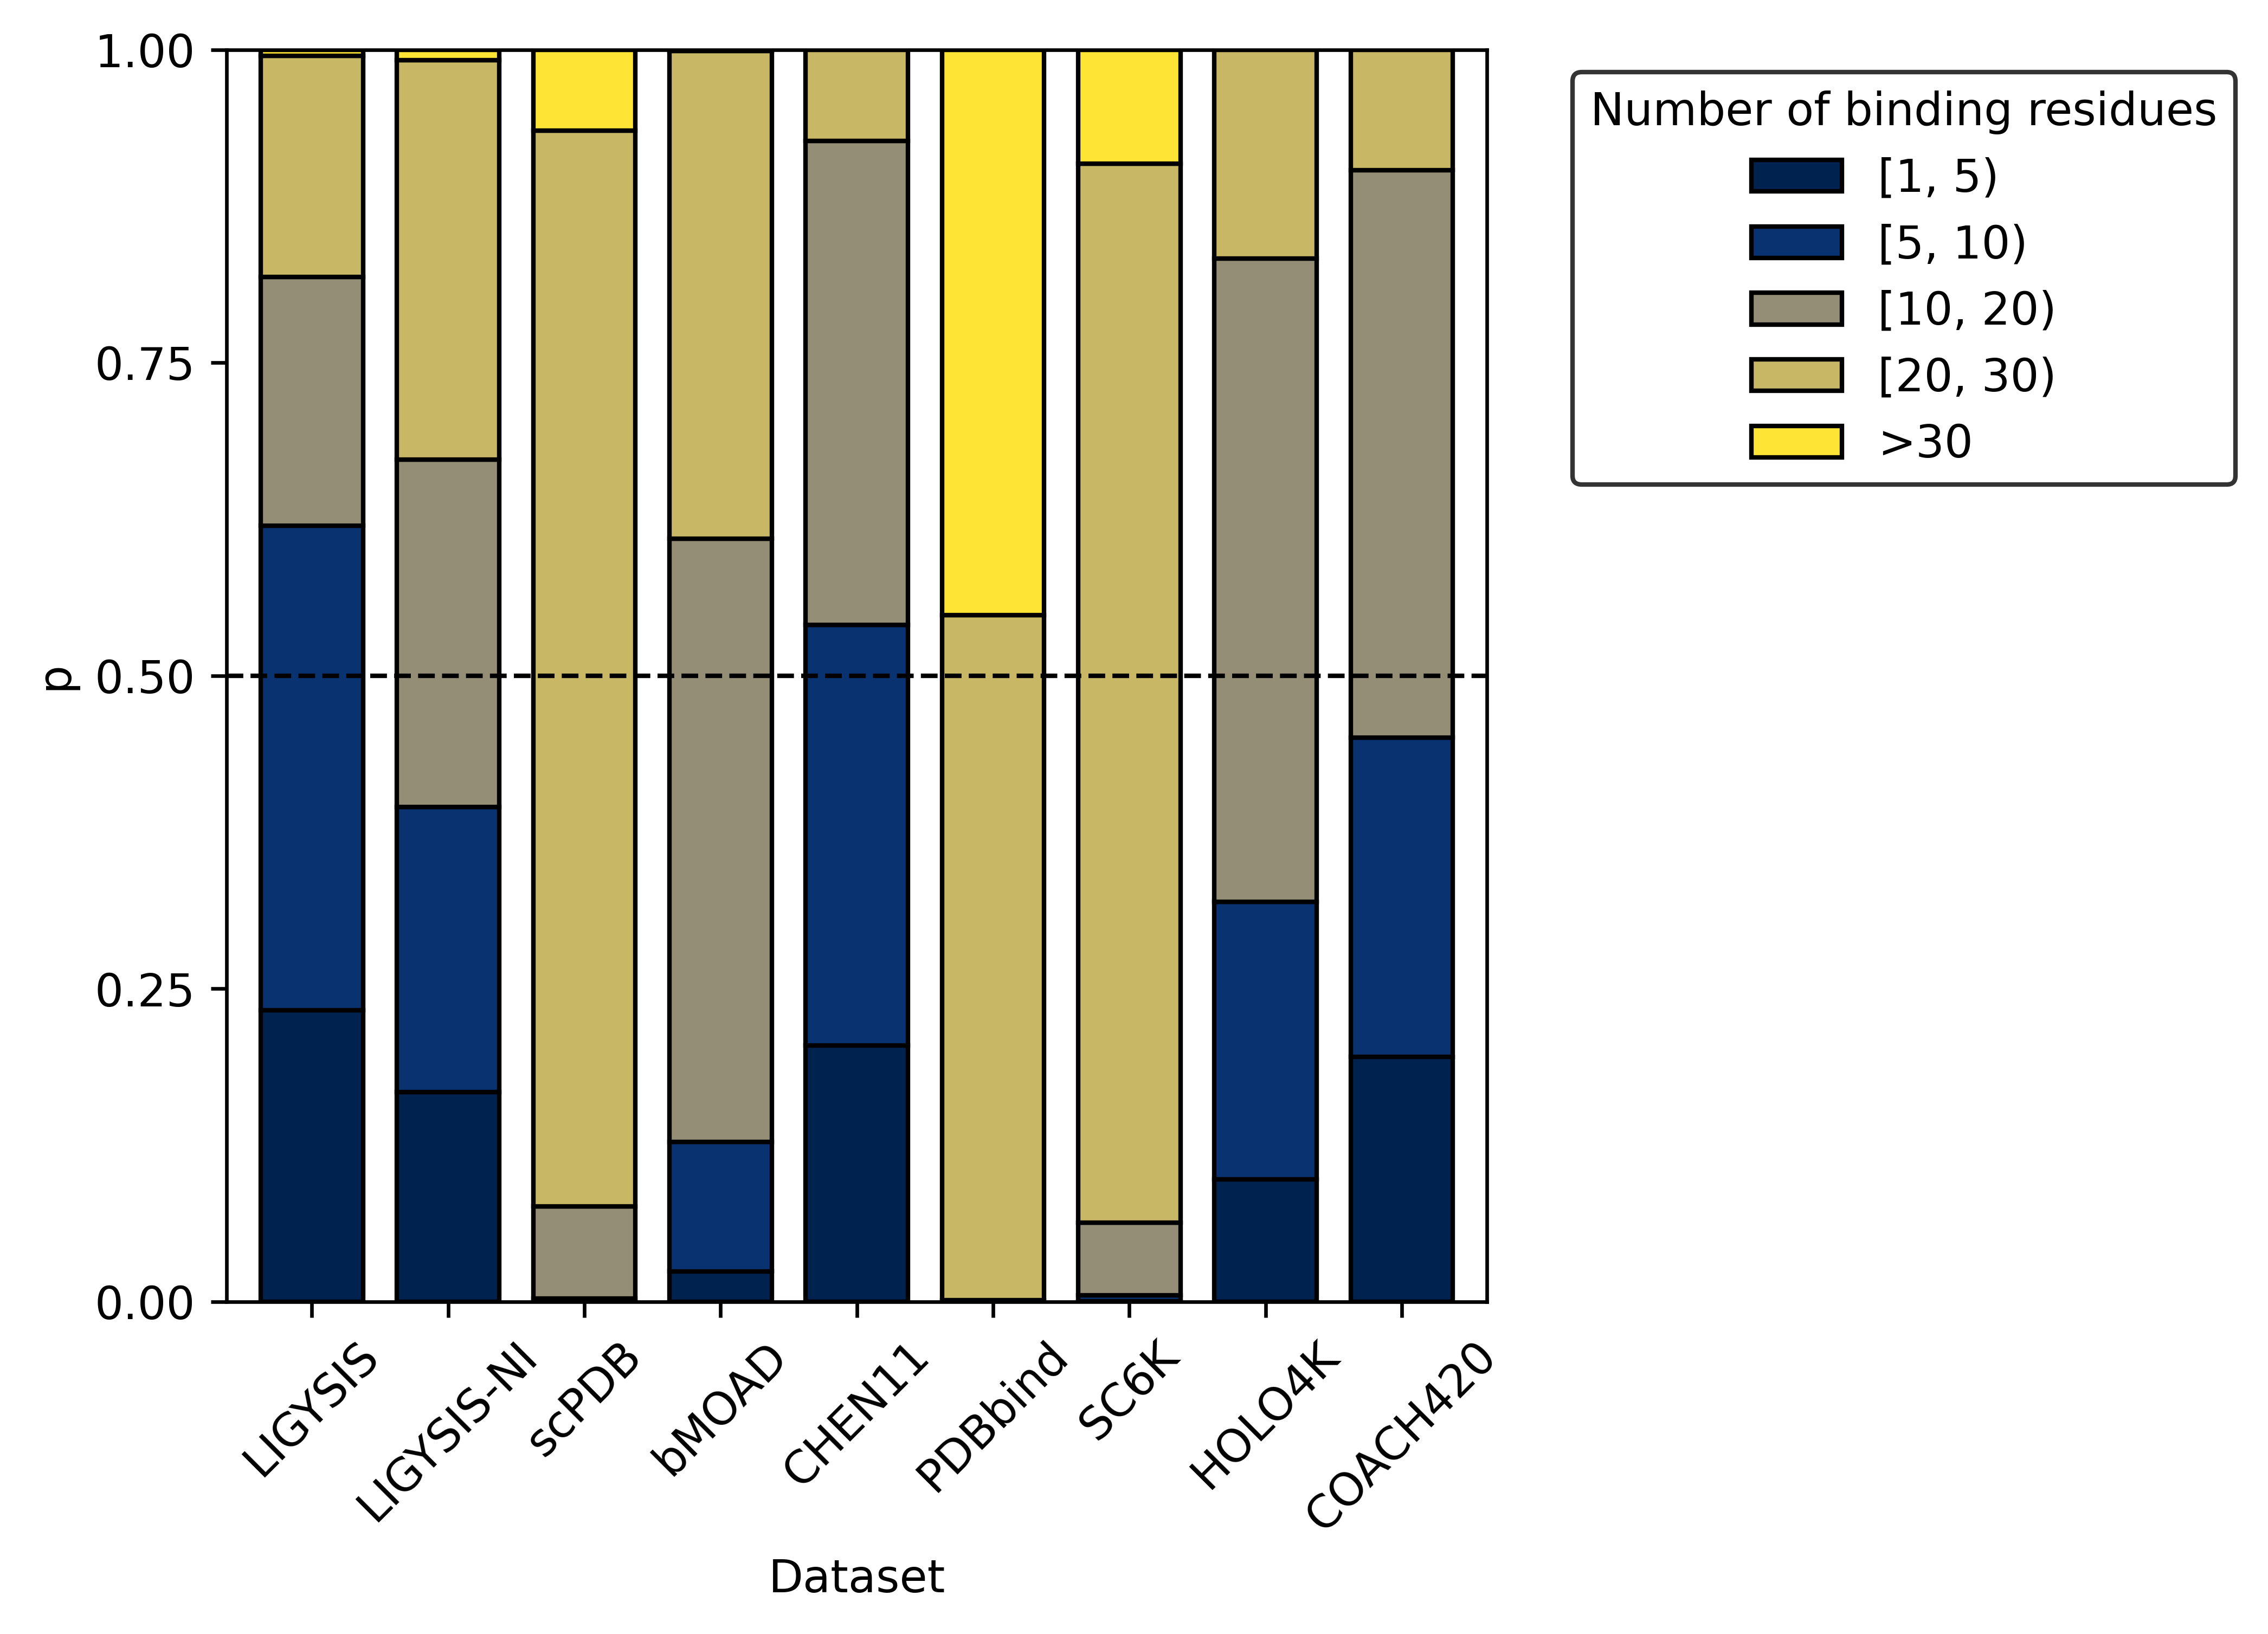

In [176]:
# Convert dictionary to DataFrame
n_aas_per_site_df = convert_dict_to_df(master_n_aas_sites_dict)

# Call the plotting function with custom parameters
bins = [0, 5, 10, 20, 50, float('inf')]

labels = ['[1, 5)', '[5, 10)', '[10, 20)', '[20, 30)','>30']

color1 = cmap(-1)
color2 = cmap(0.1)
color3 = cmap(0.6)
color4 = cmap(0.8)
color5 = cmap(0.99)

colors = [color1, color2, color3, color4, color5]
#colors = ["#000004","#51127c","#b73779","#fc8961","#fcfdbf"]
a = plot_discretised_distribution(
    n_aas_per_site_df, 'value', bins, labels, my_order,
    palette = colors,
    leg_title = "Number of binding residues", FSIZE = (5,5), DPI = 600,
    out = "./figs/DATASET_COMP_site_size.png"
)

## Ligand Diversity

In [144]:
ligs_dict_per_dataset["LIGYSIS"] = LIGYSIS_lig_names_un
ligs_dict_per_dataset["LIGYSIS-NI"] = LIGYSIS_lig_names_un_NI

In [145]:
for k in my_order:
    print(f'{k:<20}{len(ligs_dict_per_dataset[k]):>5}') # number of ligands (considering only one ligand molecule per binding site, to deal with redundancy)

LIGYSIS             22186
LIGYSIS-NI          17360
scPDB               17594
bMOAD               11484
CHEN11                479
PDBbind              5295
SC6K                 6147
HOLO4K              11528
COACH420              624


In [146]:
from collections import Counter
from scipy.stats import norm

def shannon_diversity_index(ligands):
    # Count each ligand
    count = Counter(ligands)
    count = dict(sorted(count.items(), key=lambda item: item[1], reverse = True))
    # Calculate the frequency of each ligand
    frequencies = np.array(list(count.values())) / len(ligands)
    # Calculate the Shannon diversity index
    shannon_div = -np.sum(frequencies * np.log(frequencies))
    return shannon_div, count

def simpson_diversity_index(ligands):
    count = Counter(ligands)
    count = dict(sorted(count.items(), key=lambda item: item[1], reverse = True))
    n = len(ligands)
    if n == 0:
        return 0
    # Calculate the probability of picking the same ligand twice
    p = sum((i/n) * ((i-1)/(n-1)) for i in count.values())
    # Calculate Simpson's diversity index as 1 - probability of same ligand
    simpson_div = 1 - p
    return simpson_div, count

def calculate_95ci(dataframe):
    # Constants
    z_score = norm.ppf(0.975)  # Two-tailed for 95% CI, thus 0.975 percentile

    # Calculate the standard error
    dataframe['se'] = (dataframe['prop'] * (1 - dataframe['prop']) / dataframe['total'])**0.5

    # Calculate the margins of error
    dataframe['margin'] = z_score * dataframe['se']

    # Calculate the lower and upper bounds
    dataframe['lower_ci'] = dataframe['prop'] - dataframe['margin']
    dataframe['upper_ci'] = dataframe['prop'] + dataframe['margin']

    # Ensure the CIs do not go beyond 0 or 1
    dataframe['lower_ci'] = dataframe['lower_ci'].clip(lower=0)
    dataframe['upper_ci'] = dataframe['upper_ci'].clip(upper=1)

    return dataframe#[['prop', 'lower_ci', 'upper_ci']]

In [147]:
ligs_dict_per_dataset["LIGYSIS"] = ["N-mer" if "-mer" in el else el for el in ligs_dict_per_dataset["LIGYSIS"]]
ligs_dict_per_dataset["LIGYSIS-NI"] = ["N-mer" if "-mer" in el else el for el in ligs_dict_per_dataset["LIGYSIS-NI"]]
ligs_dict_per_dataset["scPDB"] = ["N-mer" if "-mer" in el else el for el in ligs_dict_per_dataset["scPDB"]]
ligs_dict_per_dataset["bMOAD"] = ["N-mer" if "-mer" in el else el for el in ligs_dict_per_dataset["bMOAD"]]
ligs_dict_per_dataset["CHEN11"] = ["N-mer" if "-mer" in el else el for el in ligs_dict_per_dataset["CHEN11"]]
ligs_dict_per_dataset["PDBbind"] = ["N-mer" if "-mer" in el else el for el in ligs_dict_per_dataset["PDBbind"]]
ligs_dict_per_dataset["SC6K"] = ["N-mer" if "-mer" in el else el for el in ligs_dict_per_dataset["SC6K"]]
ligs_dict_per_dataset["HOLO4K"] = ["N-mer" if "-mer" in el else el for el in ligs_dict_per_dataset["HOLO4K"]]
ligs_dict_per_dataset["COACH420"] = ["N-mer" if "-mer" in el else el for el in ligs_dict_per_dataset["COACH420"]]

In [424]:
#ligs_dict_per_dataset["LIGYSIS"]

In [148]:
counts_dict = {}
lig_freqs_dfs = []
for k in my_order:
    ligands = ligs_dict_per_dataset[k]
    n_ligands = len(ligands)
    shannon_index, count_shannon = shannon_diversity_index(ligands)
    simpson_index, count_simpson = simpson_diversity_index(ligands)
    a = pd.DataFrame.from_dict(count_shannon, orient = "index").reset_index()
    a.rename(columns = {"index": "lig", 0: "count"}, inplace = True)
    a["total"] = n_ligands
    a["prop"] = a["count"]/a.total
    #a.prop.round(2, inplace = True)
    a["pct"] = a["prop"]*100
    a["dataset"] = k
    a["rank"] = range(1, len(a)+1)
    a = a[["dataset", "rank", "lig", "count", "total", "prop", "pct"]]
    lig_freqs_dfs.append(a)
    counts_dict[k] = count_shannon
    print(k)
    print(f'\tShannon Diversity:{round(shannon_index, 2):>5}')
    print(f'\tSimpson Diversity:{round(simpson_index, 2):>5}')
    #break

LIGYSIS
	Shannon Diversity: 7.83
	Simpson Diversity: 0.99
LIGYSIS-NI
	Shannon Diversity: 8.78
	Simpson Diversity:  1.0
scPDB
	Shannon Diversity: 7.19
	Simpson Diversity: 0.99
bMOAD
	Shannon Diversity: 6.56
	Simpson Diversity: 0.99
CHEN11
	Shannon Diversity: 5.18
	Simpson Diversity: 0.99
PDBbind
	Shannon Diversity: 7.85
	Simpson Diversity:  1.0
SC6K
	Shannon Diversity: 4.56
	Simpson Diversity: 0.97
HOLO4K
	Shannon Diversity:  6.5
	Simpson Diversity: 0.99
COACH420
	Shannon Diversity: 5.55
	Simpson Diversity:  1.0


In [149]:
datasets_lig_freqs = pd.concat(lig_freqs_dfs).reset_index(drop = True)

In [435]:
#my_order2 = ["LIGYSIS*", 'scPDB', 'bMOAD', 'CHEN11', 'PDBbind', 'SC6K', 'HOLO4K', 'COACH420']

In [150]:
rank5_df = datasets_lig_freqs.query('rank <6 & dataset in @my_order').copy().reset_index(drop = True)

In [151]:
for k, v in counts_dict.items():
    print(k)
    for i, k2 in enumerate(v.keys()):
        if i > 4:
            break
        else:
            print(f'\t{k2}:\t{v[k2]}')

LIGYSIS
	ZN:	1885
	CA:	1130
	MG:	769
	CLR:	298
	MN:	186
LIGYSIS-NI
	CLR:	298
	MAN:	186
	ADP:	178
	FUC:	140
	ATP:	117
scPDB
	FAD:	876
	NAD:	627
	ADP:	606
	ATP:	406
	NAP:	400
bMOAD
	ADP:	388
	FAD:	349
	ATP:	249
	SAH:	222
	FMN:	221
CHEN11
	HEM:	24
	FAD:	13
	ADP:	12
	GAL:	12
	AMP:	9
PDBbind
	N-mer:	270
	ADP:	31
	GDP:	25
	017:	25
	ATP:	20
SC6K
	ADP:	613
	ATP:	447
	FAD:	388
	NAD:	293
	NAP:	255
HOLO4K
	NAD:	422
	FAD:	350
	HEM:	324
	PLP:	296
	ADP:	234
COACH420
	BGC:	16
	ATP:	16
	ADP:	16
	NAD:	11
	XYP:	10


In [152]:
for dataset_id, rows in rank5_df.groupby("dataset"):
    print(f'\t{dataset_id}\t\t{round(rows.pct.sum(), 2)}')

	CHEN11		14.61
	COACH420		11.06
	HOLO4K		14.1
	LIGYSIS		19.24
	LIGYSIS-NI		5.29
	PDBbind		7.01
	SC6K		32.47
	bMOAD		12.44
	scPDB		16.57


In [156]:
rank5_df = calculate_95ci(rank5_df)

In [153]:
ligand_colors = {

    "ADP": "royalblue",#"#228B22",
    "ATP": "dodgerblue",#"#355E3B", 
    "AMP": "cornflowerblue",#"#4CBB17",
    "GDP": "lightskyblue",#"#98FF98",

    "FAD": "darkred",#"#800020",
    "NAD": "firebrick", #"#960018",
    "NAP": "crimson", #"#B22222",
    "SAH": "tomato", #"#E34234",
    "FMN": "salmon",#"#DC143C",
    "HEM": "red",#"#E0115F",
    "PLP": "indianred", #"#FF2400",

    "ZN": "forestgreen",
    "CA": "green",
    "MG": "seagreen",
    "MN": "palegreen",

    "GAL": "khaki",
    "BGC": "orange",
    "XYP": "gold",
    "MAN": "darkorange",
    "FUC": "goldenrod",

    "N-mer": "gray",

    "017": "snow",
    "CLR": "ivory",
    
}

In [166]:
def plot_data(df, ligand_colors, DPI = 100, out = None):
    # Filter relevant columns if df has extra columns
    #df = df[['dataset', 'rank', 'lig', 'pct', 'lower_ci', 'upper_ci']]
    
    # Get unique datasets and ranks
    datasets = df['dataset'].unique()
    ranks = df['rank'].unique()
    ligands = df['lig'].unique()
    num_datasets = len(datasets)
    num_ranks = len(ranks)

    for lig in ligands:
        if lig not in ligand_colors:
            ligand_colors[lig] = "tan"
    #ligand_colors = {lig: colors(i) for i, lig in enumerate(ligands)}
    
    # Prepare the plot
    fig, ax = plt.subplots(figsize=(12, 6.5), dpi=DPI)
    
    # Set bar width and positions
    bar_width = 0.1
    index = np.arange(num_datasets) * (num_ranks + 1) * bar_width
    
    # Plot bars for each rank within each dataset
    for i, rank in enumerate(ranks):
        # Select data for this rank
        subset = df[df['rank'] == rank]
        
        # Ensure subset is ordered correctly by dataset
        subset = subset.set_index('dataset').reindex(datasets).reset_index()
        #print(subset.columns)
        errors = [subset['margin']*100]#[subset['lower_ci'], subset['upper_ci']]
        
        # Plotting each group of bars for this rank
        bars = ax.bar(index + i * bar_width, subset['pct'], bar_width, label=f'Rank {rank}',
                      yerr=errors, capsize=3, error_kw={'ecolor':'black', 'capthick':0.75, 'elinewidth': 1.25},
                      edgecolor='black', linewidth=0.75,
                     color=[ligand_colors[lig] for lig in subset['lig']],)
        
        # Add ligand names under each bar
        for rect, ligand in zip(bars, subset['lig']):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, -0.01, ligand, ha='center', va='top', 
                    fontsize=9, rotation=90, transform=ax.get_xaxis_transform())

    # Formatting the plot
    ax.set_xlabel('Dataset')
    ax.set_ylabel('Frequency (%)')
    #ax.set_title('Percentage by Dataset and Rank')
    ax.set_xticks(index + bar_width*num_ranks/2)
    ax.set_xticklabels(datasets)
    ax.set_yticklabels([0, 2, 4, 6, 8, 10])
    ax.tick_params(axis='x', length=0, pad = 50)  # Remove x-ticks
    ax.set_ylim(0, 14)
    
    # Adjust the x-axis label position
    ax.xaxis.labelpad = 20
    
    #import matplotlib.pyplot as plt
    import matplotlib.patheffects as path_effects
    
    custom_lines = [plt.Line2D([0], [0], color=ligand_colors[lig], lw=8, path_effects=[path_effects.withStroke(linewidth=10, foreground='black')]) for lig in list(ligand_colors.keys())]
    

    #ax.legend(custom_lines, list(ligand_colors.keys()), title='Ligand', frameon=False, edgecolor='black', bbox_to_anchor=(1.05, 1), loc='upper left',)
    
    
    plt.tight_layout()
    if out != None:
        plt.savefig(out, dpi = DPI, format = "png")
    plt.show()

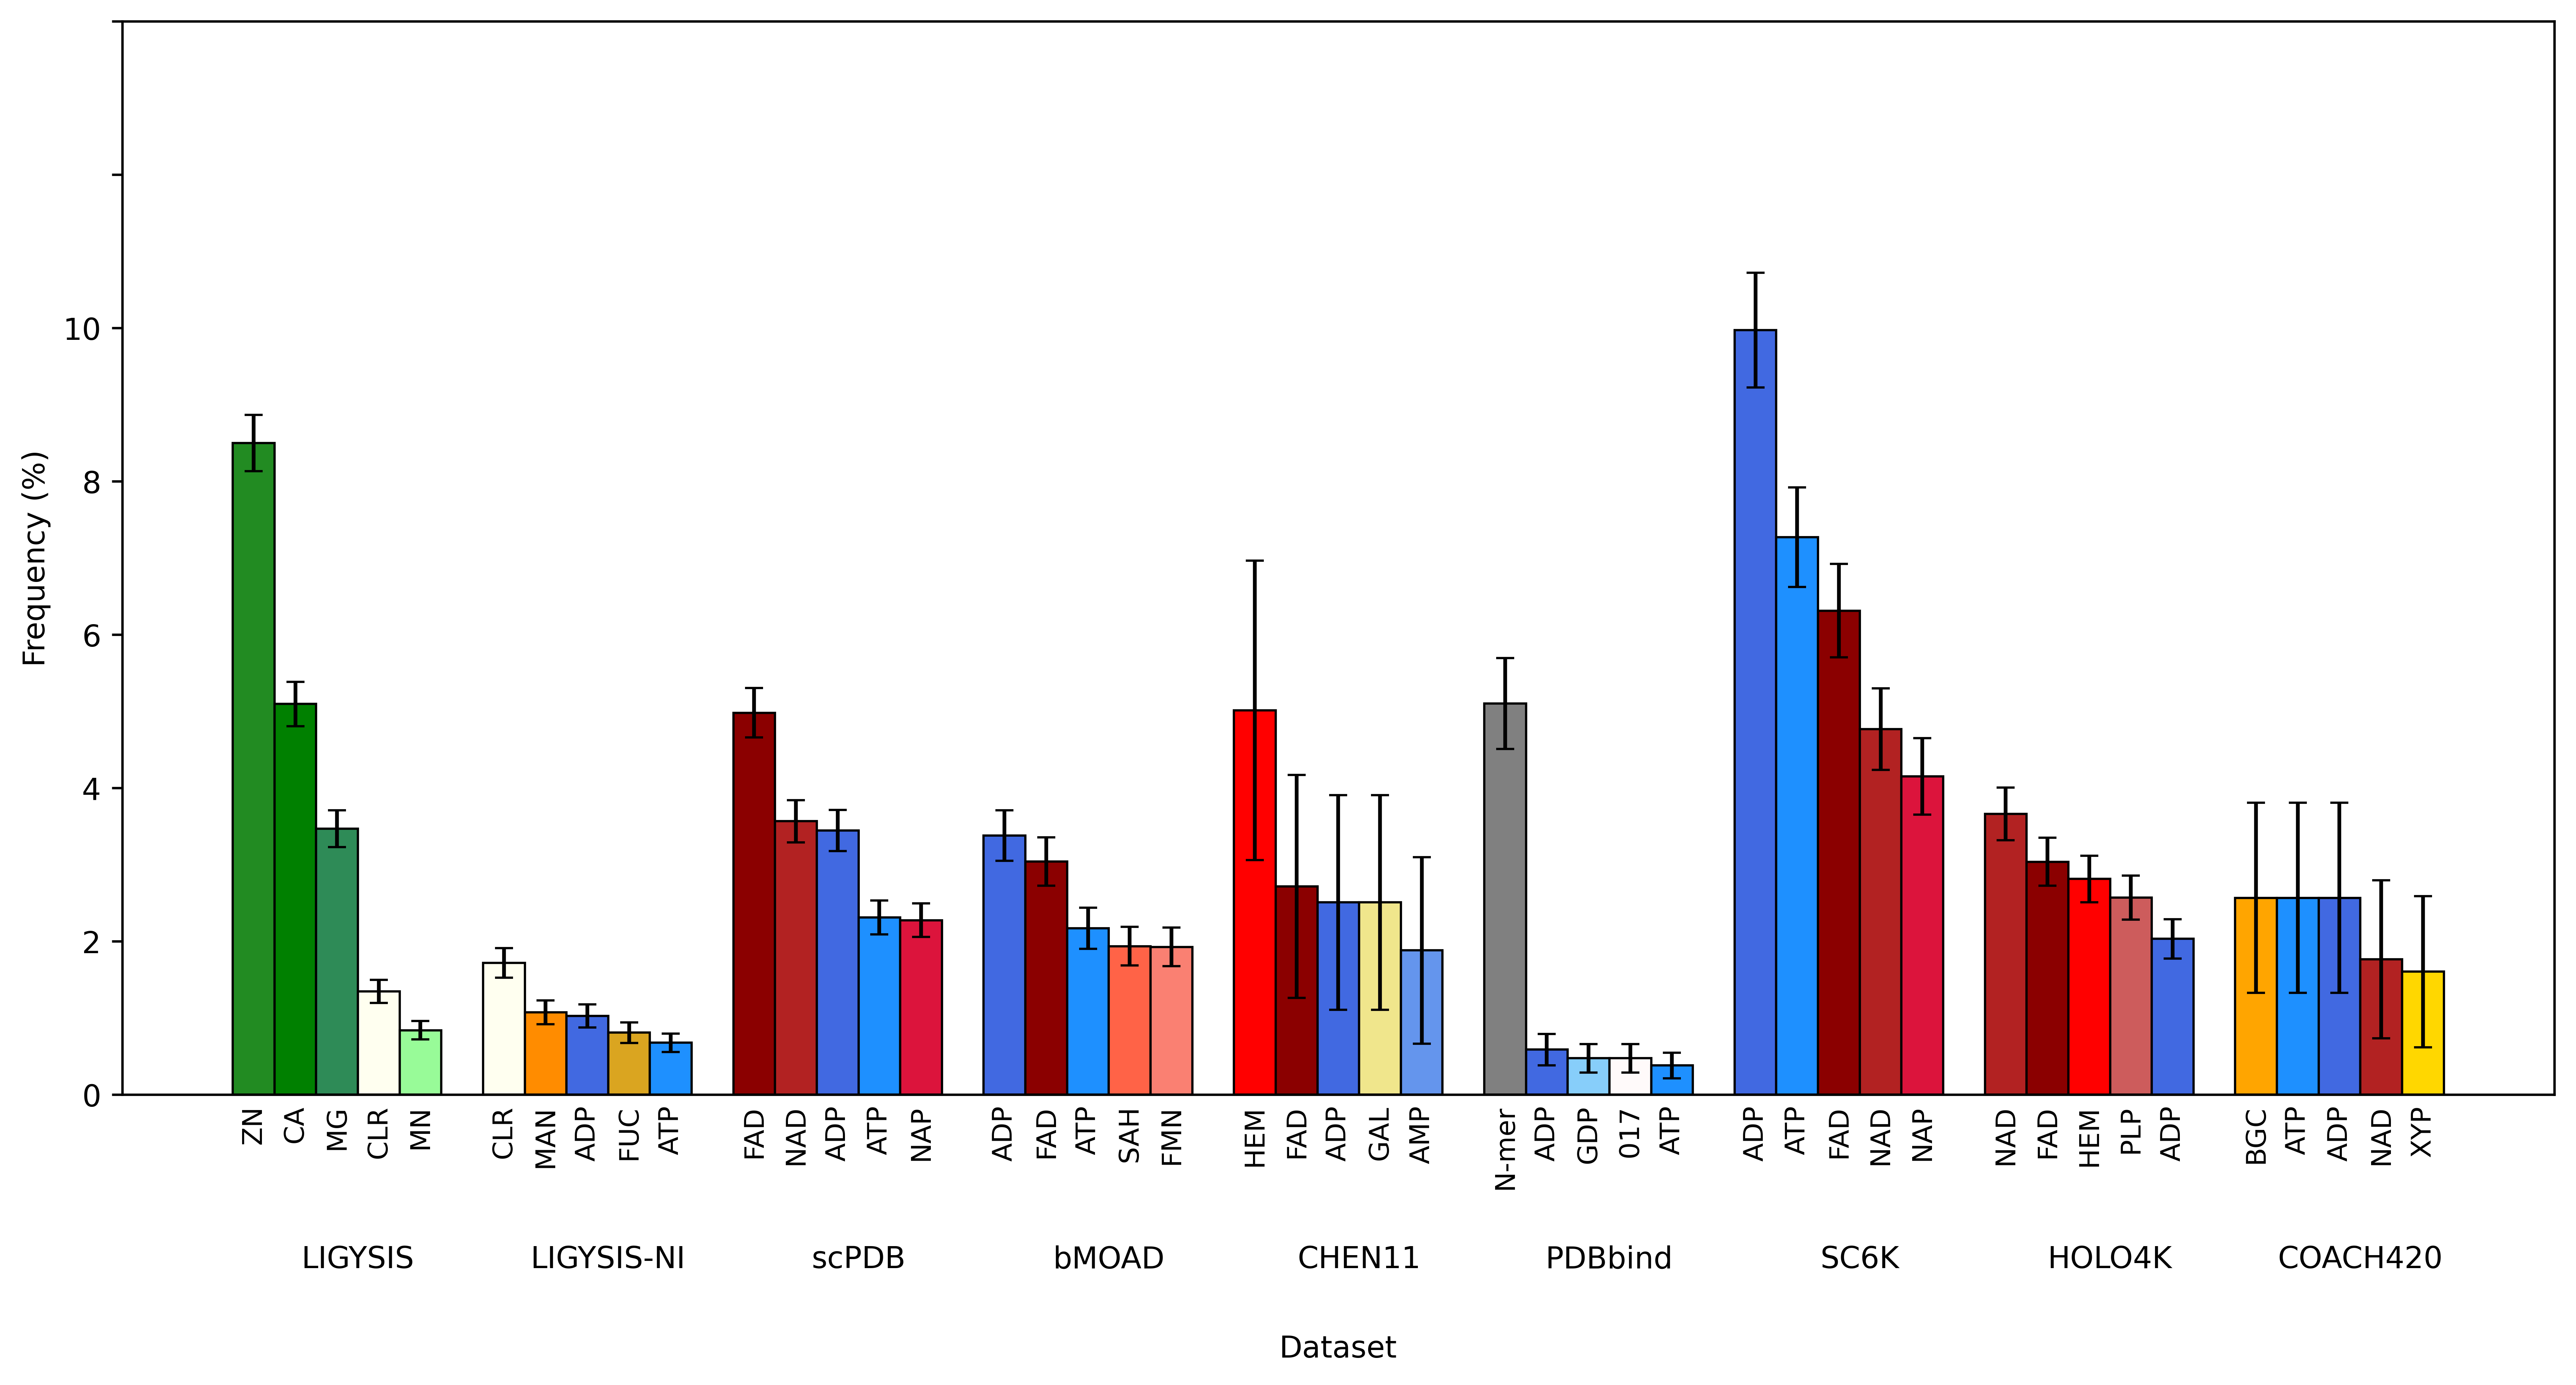

In [167]:
plot_data(rank5_df, ligand_colors, DPI = 600, out = "./figs/ligand_composition_NO_IONS_DEF.png")